**D1DAE: Análise Estatística para Ciência de Dados (2021.1)** <br/>
IFSP Campinas

Profs: Ricardo Sovat, Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
# pacotes usados neste notebook
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# estilos padrão para os plots/visualizações
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

<h1>Especificação</h1><hr/>

Neste notebook, realizaremos uma **Análise Exploratória de Dados** em um conjunto de dados sobre aplicativos da Google Play Store. <br/>
Nosso objetivo é responder algumas perguntas e hipóteses sobre o dataset. Para isso, analisaremos as variáveis do dataset em diferentes cenários, utilizando um ferramental que envolve a manipulação de dados, estatísticas descritivas e visualizações. <br/>
Focaremos mais nas estratégias de como responder às perguntas do que necessariamente no código para chegar nisso. Deixaremos a cargo de vocês o entendimento do ferramental. <br/>

Outro detalhe é que a apresentação das respostas neste notebook é _crua_. Você deveria escolher quais gráficos ou elementos são mais interessante para cada caso e, então, contar uma história: _Storytelling with Data_. 

Como suporte para visualização:
- https://datavizcatalogue.com/
- https://www.python-graph-gallery.com/

<h2>1. Dataset</h2>
<hr/>

**Dataset**: Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps <br/>

Este dataset contém dados sobre aplicativos da Google Play Store (2010 até agosto de 2018). <br/>
Cada *observação (registro/linha)* consiste de informações de um app, tais como categoria, avaliação, tamanho, entre outros. <br/>
Cada app possui uma avaliação (coluna 'Rating') que consiste da nota média de um conjunto de avaliações (coluna 'Reviews').

### 1.1 Importando o Dataset

In [2]:
df = pd.read_csv("./datasets/googleplaystore_preprocessado.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


### 1.2 Informações básicas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8194 non-null   object 
 1   Category        8194 non-null   object 
 2   Rating          8194 non-null   float64
 3   Reviews         8194 non-null   int64  
 4   Size            8194 non-null   float64
 5   Installs        8194 non-null   int64  
 6   Type            8194 non-null   object 
 7   Price           8194 non-null   float64
 8   Content Rating  8194 non-null   object 
 9   Genres          8194 non-null   object 
 10  Last Updated    8194 non-null   object 
 11  Current Ver     8194 non-null   object 
 12  Android Ver     8194 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 832.3+ KB


<br/>

O dataset pré-processado possui **8194** registros/observações/linhas e **13** atributos/variáveis/colunas.
Nenhum atributo possui valores NaN.

<h2>2. Análise Exploratória de Dados</h2>
<hr/>

**Estatísticas descritivas básicas**

In [5]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


## 2.1 Quais são os 10 Apps mais baixados?
Para analisar quais são os apps mais baixados, ordenaremos os registros pela coluna "Installs". Em caso de empate, desempataremos pela _avaliação_ dos aplicativos, ou seja, realizaremos uma nova ordenação pela coluna "Rating".

In [6]:
top10_apps_mais_baixados = df.sort_values(by='Installs', ascending=False).head(10)
top10_apps_mais_baixados

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1873,Instagram,SOCIAL,4.5,66577313,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-31,1.0.0,Varies with device
2377,Google,TOOLS,4.4,8033493,4100000.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,1.0.0,Varies with device
292,Gmail,COMMUNICATION,4.3,4604324,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,1.0.0,Varies with device
293,Hangouts,COMMUNICATION,4.0,3419249,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,1.0.0,Varies with device
2588,Google Drive,PRODUCTIVITY,4.4,2731171,7000000.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,1.0.0,Varies with device
290,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
288,WhatsApp Messenger,COMMUNICATION,4.4,69119316,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,1.0.0,Varies with device
287,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
2290,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,19000000.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,1.0.0,Varies with device
1882,Google+,SOCIAL,4.2,4831125,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-26,1.0.0,Varies with device


Text(0.5, 1.0, 'Top 10 Apps mais baixados')

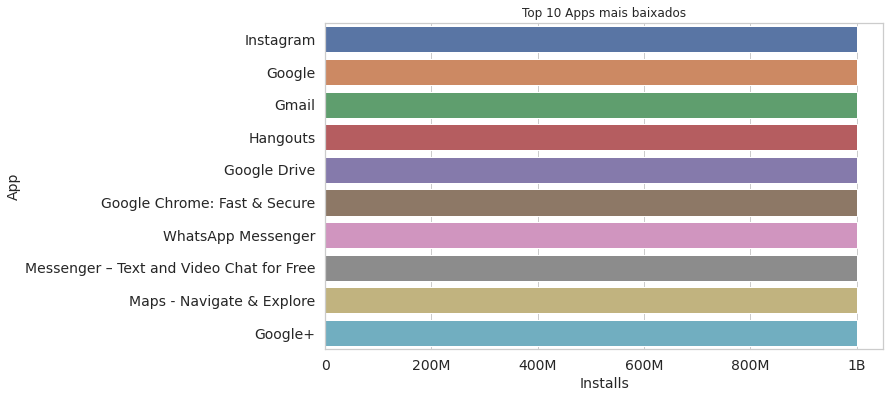

In [7]:
# plotando o mesmo gráfico, mas na horizontal para um melhor entendimento
sns.barplot(data=top10_apps_mais_baixados, x='Installs', y='App')
plt.xticks([0, 0.2e9, 0.4e9, 0.6e9, 0.8e9, 1e9], ['0', '200M', '400M', '600M', '800M', '1B'])
plt.title('Top 10 Apps mais baixados')

### 2.2 Qual a quantidade de aplicativos por categoria?

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [9]:
df.value_counts(subset=['Category'])

Category           
FAMILY                 1608
GAME                    912
TOOLS                   718
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         296
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS                  260
COMMUNICATION           256
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      204
SOCIAL                  203
TRAVEL_AND_LOCAL        187
SHOPPING                180
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           148
DATING                  134
EDUCATION               118
MAPS_AND_NAVIGATION     118
ENTERTAINMENT           102
FOOD_AND_DRINK           94
AUTO_AND_VEHICLES        73
WEATHER                  72
LIBRARIES_AND_DEMO       64
HOUSE_AND_HOME           62
ART_AND_DESIGN           61
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
dtype: int64

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

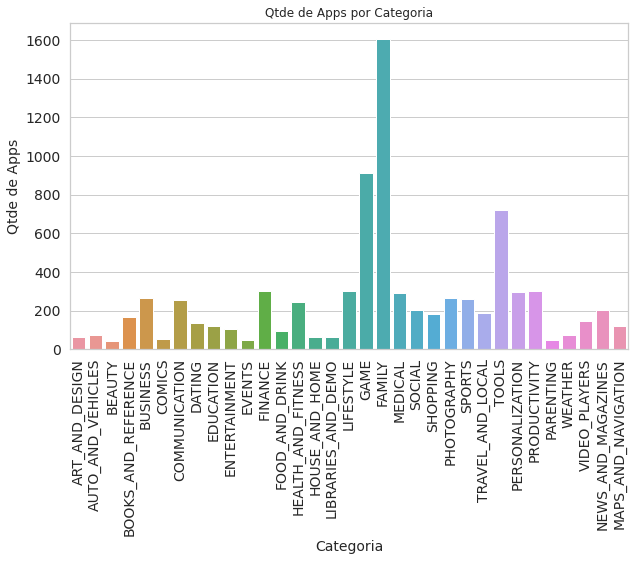

In [10]:
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Qtde de Apps')
plt.title('Qtde de Apps por Categoria')

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

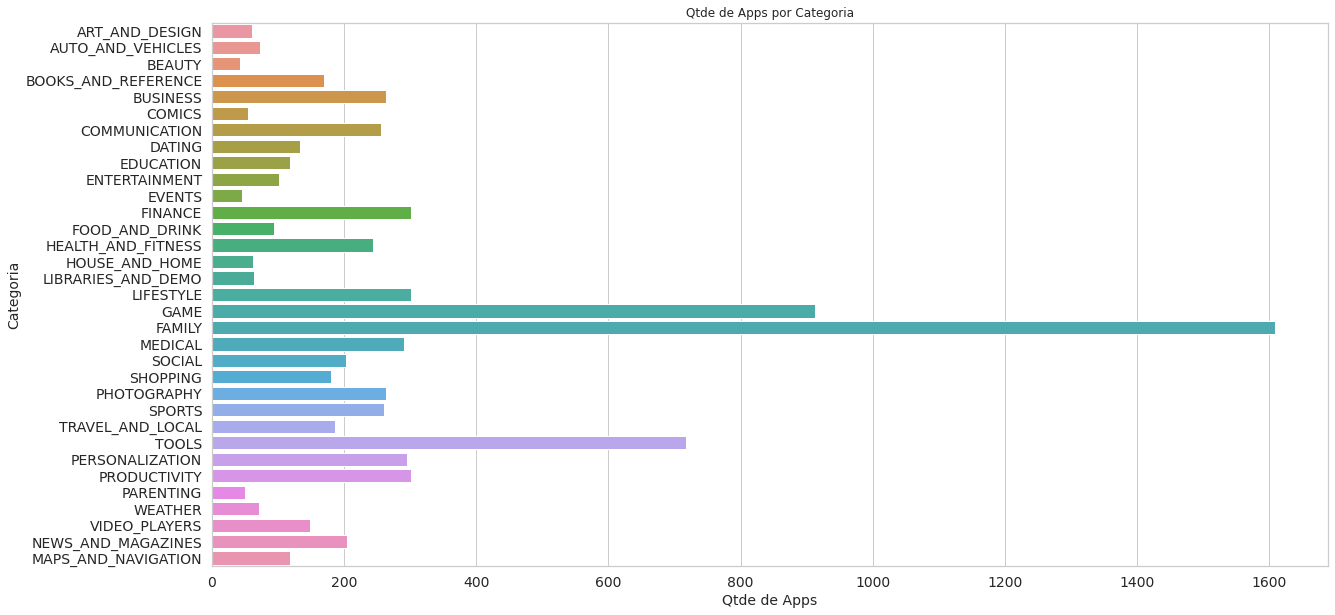

In [11]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, y='Category')
plt.xlabel('Qtde de Apps')
plt.ylabel('Categoria')
plt.title('Qtde de Apps por Categoria')

A distribuição das barras não está **ordenada**. Para ordená-las, precisamos passar a lista de nomes da 'Category' na orde que queremos visualizar.

Neste caso, vamos visualizar as barras em **ordem decrescente** da quantidade de apps por categoria.

In [12]:
order = df['Category'].value_counts().index
order

Index(['FAMILY', 'GAME', 'TOOLS', 'FINANCE', 'PRODUCTIVITY', 'LIFESTYLE',
       'PERSONALIZATION', 'MEDICAL', 'BUSINESS', 'PHOTOGRAPHY', 'SPORTS',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'NEWS_AND_MAGAZINES', 'SOCIAL',
       'TRAVEL_AND_LOCAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS',
       'DATING', 'EDUCATION', 'MAPS_AND_NAVIGATION', 'ENTERTAINMENT',
       'FOOD_AND_DRINK', 'AUTO_AND_VEHICLES', 'WEATHER', 'LIBRARIES_AND_DEMO',
       'HOUSE_AND_HOME', 'ART_AND_DESIGN', 'COMICS', 'PARENTING', 'EVENTS',
       'BEAUTY'],
      dtype='object')

Text(0.5, 1.0, 'Qtde de Apps por Categoria')

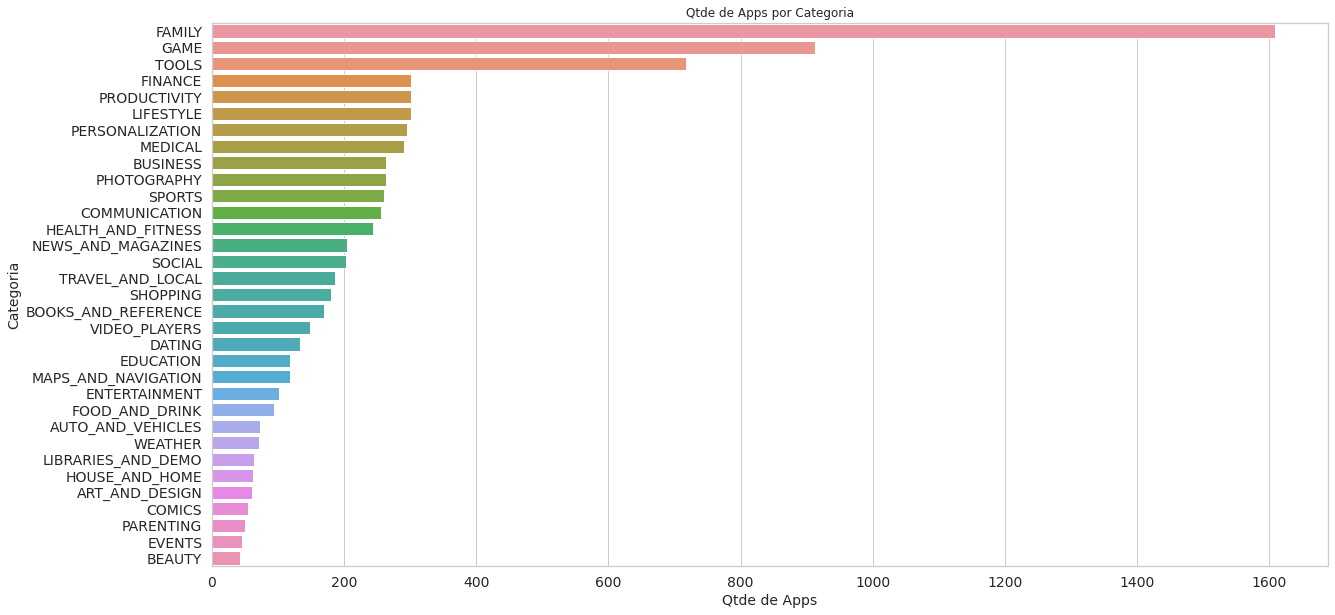

In [13]:
plt.figure(figsize=(20, 10))

sns.countplot(data=df, y='Category', order=order)
plt.xlabel('Qtde de Apps')
plt.ylabel('Categoria')
plt.title('Qtde de Apps por Categoria')

As cores ilustradas no plot _não tem quaisquer significado_ (nenhuma variável foi codificada usando cor).

### 2.3 Como se comportam as avaliações dos aplicativos? (tendências centrais, distribuição, etc)

In [14]:
stats = df.describe()
stats

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [15]:
df['Rating'].describe()

count    8194.000000
mean        4.173175
std         0.536672
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [16]:
print(f"A nota média (avaliação) dos aplicativos é de {stats.loc['mean', 'Rating']:.2f} +- {stats.loc['std', 'Rating']:.2f}")
print(f"A media das avaliações é de {stats.loc['50%', 'Rating']}")

A nota média (avaliação) dos aplicativos é de 4.17 +- 0.54
A media das avaliações é de 4.3


Note que a **média** e a **mediana** não estão muito longe e que o **desvio padrão** não é tão alto, mesmo com uma escala tão baixa com é a das avaliações (de 0 a 5). Tudo isso indica (em números) que a dispersão de notas/avaliações dos aplitativos não é tão grande.

#### HISTOGRAMA

Text(0.5, 1.0, 'Histograma das avaliações de todos os apps')

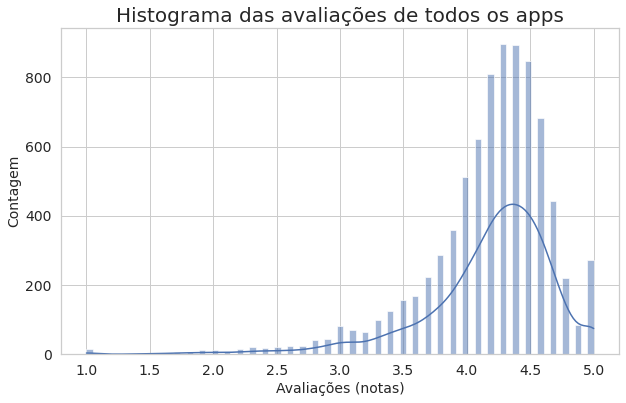

In [17]:
# kde ==> kernel density estimation
# É um jeito de estimar a função densidade de probabilidade de uma variável aleatória.

sns.histplot(data=df, x='Rating', kde=True)
plt.xlabel('Avaliações (notas)')
plt.ylabel('Contagem')
plt.title('Histograma das avaliações de todos os apps', fontsize=20)

A **distribuição das avaliações** tem semelhanças com um _distribuição normal_ enviesada para à esquerda (skewed left distribution). <br/>

Apenas olhando este gráfico podemos notar que a grande maioria das avaliações estão no intervalo entre 4.0 e 5.0.

#### BOXPLOT

In [18]:
# mostra uma coluna da tabela (dataframe) como uma outra tabela, ao invés de uma Series
stats[['Rating']]

,Rating
count,8194.000000
mean,4.173175
std,0.536672
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


Text(0.5, 1.0, 'Boxplot das avaliações de todos os aplicativos')

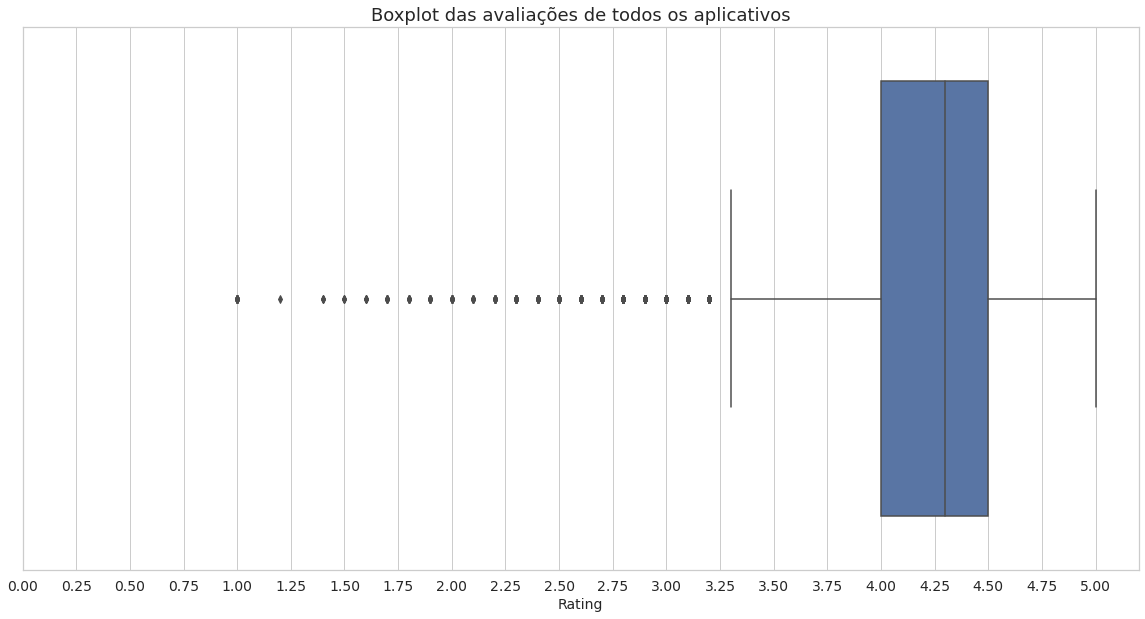

In [19]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Rating')
plt.xticks(np.arange(0.0, 5.01, 0.25))  # gerando novos ticks para o eixo x
plt.title('Boxplot das avaliações de todos os aplicativos', fontsize=18)

Pelo boxplot, é possível enxergar que 50% dos dados estão entre as avaliações 4.0 (Q1) e 4.5 (Q3), confirmando os resultados vindos do método `.describe()`.

Por outro lado, ele interpretou que os aplicativos com avaliações _menores do que ~3.25_ são ***outliers*** da distribuição. <br/>
Entretanto, é comum termos aplicativos mal avaliados. Assim sendo, a inclusão destes aplicativos na análise é relevante.

In [20]:
apps_com_rating_leq_3_25 = df.query('Rating <= 3.25')
apps_com_rating_leq_3_25

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700000.0,5000,Free,0.0,Everyone,Art & Design,2018-06-06,1.0.0,4.2 and up
86,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250,1100000.0,100000,Free,0.0,Everyone,Auto & Vehicles,2018-04-27,1.4,4.0.3 and up
199,Plugin:AOT v5.0,BUSINESS,3.1,4034,23000.0,100000,Free,0.0,Everyone,Business,2015-09-11,3.0.1.11 (Build 311),2.2 and up
264,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965,15000000.0,5000000,Free,0.0,Teen,Comics,2018-07-03,6.3.0,4.0.3 and up
265,Daily Manga - Comic & Webtoon,COMICS,3.2,1446,7100000.0,100000,Free,0.0,Mature 17+,Comics,2018-05-18,1.0,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8056,Florida Blue,HEALTH_AND_FITNESS,3.2,499,34000000.0,100000,Free,0.0,Everyone,Health & Fitness,2018-07-10,4.2.1,7.0 and up
8078,SB · FN 1870 Mobile Banking,FINANCE,2.9,139,3300000.0,10000,Free,0.0,Everyone,Finance,2017-06-19,3.0.5,4.0 and up
8084,Pint - FN Theme,PERSONALIZATION,2.5,6,234000.0,100,Free,0.0,Everyone,Personalization,2013-08-10,1.0,2.2 and up
8138,Fisher-Price® Smart Connect™,TOOLS,2.7,422,72000000.0,50000,Free,0.0,Everyone,Tools,2018-02-23,2.4.1,4.4 and up


In [21]:
print(f'A quantidade de apps considerados "outliers" por suas avaliações é de {apps_com_rating_leq_3_25.shape[0]} '
      f'({apps_com_rating_leq_3_25.shape[0] * 100 / df.shape[0]:.2f}%) de um total de {df.shape[0]} apps.')

A quantidade de apps considerados "outliers" por suas avaliações é de 492 (6.00%) de um total de 8194 apps.


<br/>

O boxplot do seaborn identifica outliers usando o método de detecção via IQR. Para tanto, ele considera como **outlier** qualquer valor fora do intervalo **\[Q1 - 1.5\*IQR, Q3 + 1.5\*IQR\]**. Podemos controlar o fator **1.5** alterando o parâmetro `whis`. <br/>

Se quisermos, por exemplo, que o boxplot não tenha _outliers_, basta passar um valor alto para o `whis`.

Text(0.5, 1.0, 'Boxplot das avaliações de todos os aplicativos')

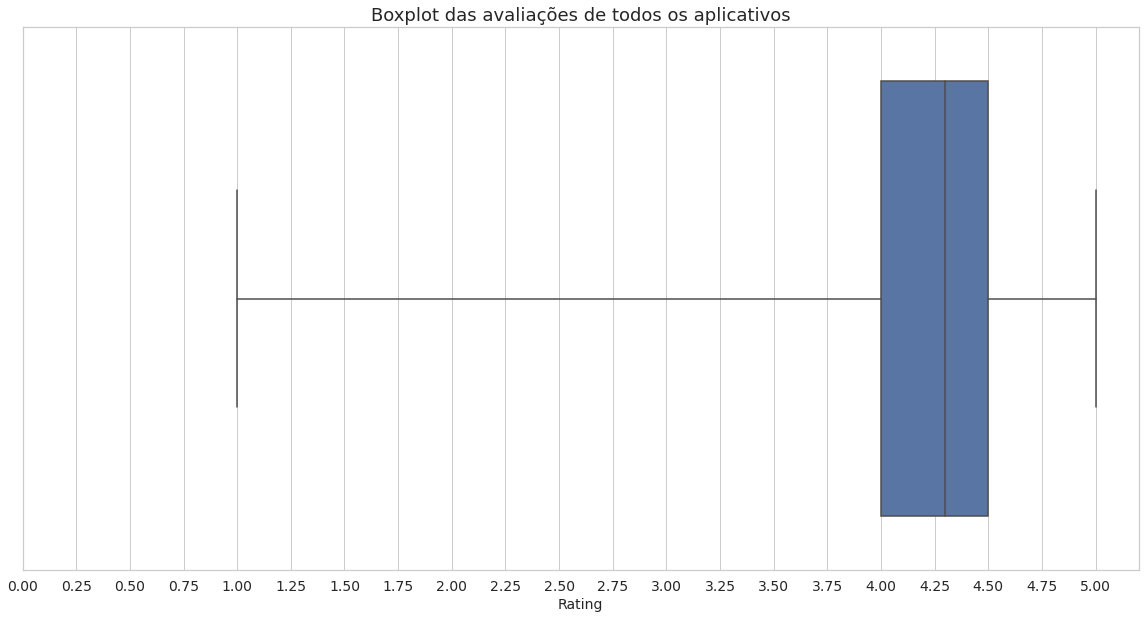

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, x='Rating', whis=10)
plt.xticks(np.arange(0.0, 5.01, 0.25))
plt.title('Boxplot das avaliações de todos os aplicativos', fontsize=18)

#### VIOLIN PLOT

Text(0.5, 1.0, 'Violin Plot das avaliações de todos os aplicativos')

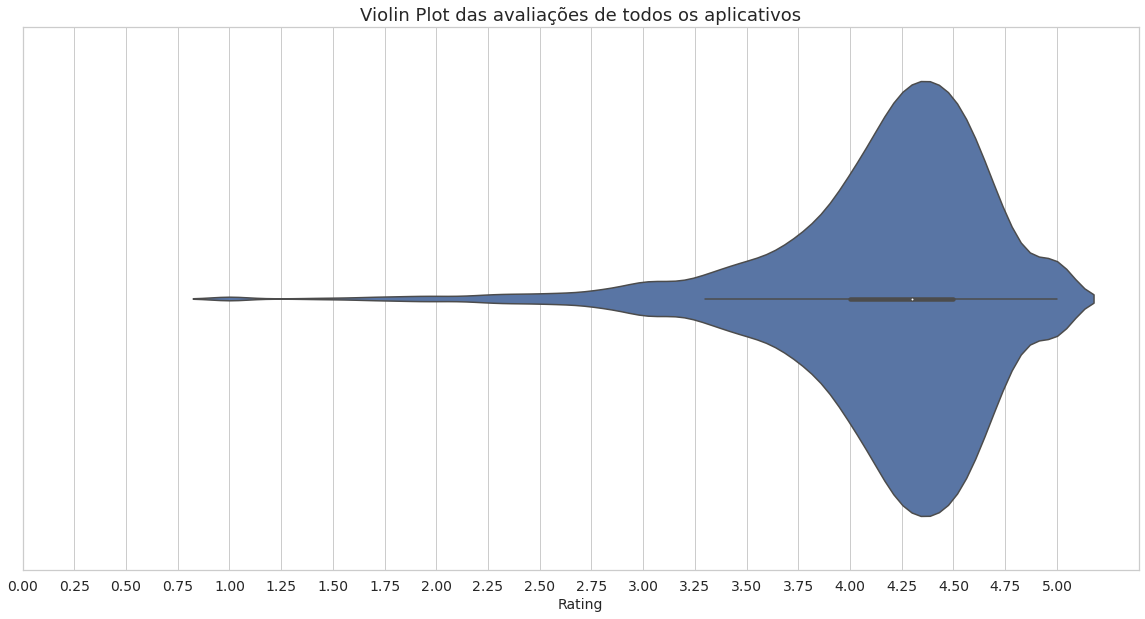

In [23]:
plt.figure(figsize=(20, 10))
sns.violinplot(data=df, x='Rating')
plt.xticks(np.arange(0.0, 5.01, 0.25))
plt.title('Violin Plot das avaliações de todos os aplicativos', fontsize=18)

O _violin plot_ nos dá uma noção mais precisa de como os dados estão distribuídos, principalmente, entre os quartis.

### 2.4 Qual categoria é a melhor avaliada?

In [24]:
stats = df.groupby('Category').describe()['Rating']
stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,263.0,4.098479,0.659862,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,256.0,4.121484,0.470260,1.0,4.000,4.2,4.400,5.0
DATING,134.0,3.970149,0.637786,1.0,3.600,4.1,4.400,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9


Vamos considerar que as melhores categorias são aquelas que possuem as maiores **médias**.

In [25]:
stats.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
EVENTS,45.0,4.435556,0.419499,2.9,4.200,4.5,4.700,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
PERSONALIZATION,296.0,4.331419,0.360027,2.5,4.200,4.4,4.600,5.0
PARENTING,50.0,4.300000,0.517845,2.0,4.100,4.4,4.675,5.0
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
GAME,912.0,4.247368,0.384116,1.0,4.100,4.3,4.500,5.0
SOCIAL,203.0,4.247291,0.457209,1.9,4.100,4.3,4.500,5.0


Ao computar a _média das avaliações por categoria_ e ordenar pela **maior média**, constatamos que a categoria "EVENTS" possui a maior média. <br/>
Mas, **não** é possível afirmar que essa é a _categoria melhor avaliada **apenas olhando para estes resultados**_, pois **o tamanho de cada amostra/grupo** (i.e., a quantidade de aplicativos por categoria) é diferente. Além disso, o **desvio padrão** também muda de categoria para categoria.<br/>

P. ex., a categoria "EVENTS" possui 45 apps, enquanto "BOOKS_AND_REFERENCE" possui 169.

Precisaríamos rodar algum **teste estatístico específico**, p. ex., para ter essa certeza. <br/>

Outra meneira (mais simples), é garantir **a mesma quantidade de observações para cada grupo** (mesmo tamanho de amostra). <br/>
Para isso, assumiríamos o tamanho do menor grupo, suponha N, e, para cada grupo restante, selecionaríamos _aleatoriamente_ N observações. <br/>
Mas, e se, **ao acaso**, selecionamos apenas observações com uma dada característica que não, necessariamente, representasse bem nossa distribuição original? <br/>
Uma alternativa, é realizar essa seleção múltiplas vezes. Mas este é um assunto para depois.

Algumas discussões interessantes sobre o assunto: <br/>
- https://www.researchgate.net/post/Is_there_any_way_to_compare_two_datasets_with_drastically_different_sample_sizes#:~:text=Most%20recent%20answer&text=One%20way%20to%20compare%20the,the%20single%204%20sample%20set.
- https://stackoverflow.com/a/63099989
- https://www.statisticshowto.com/unequal-sample-sizes/
- https://www.graphpad.com/support/faq/how-to-compare-two-means-when-the-groups-have-different-standard-deviations/


Por ora, vamos simplificar e assumir que apenas analisar esses resultados é suficiente para decidirmos quais são as categorias melhores avaliadas.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

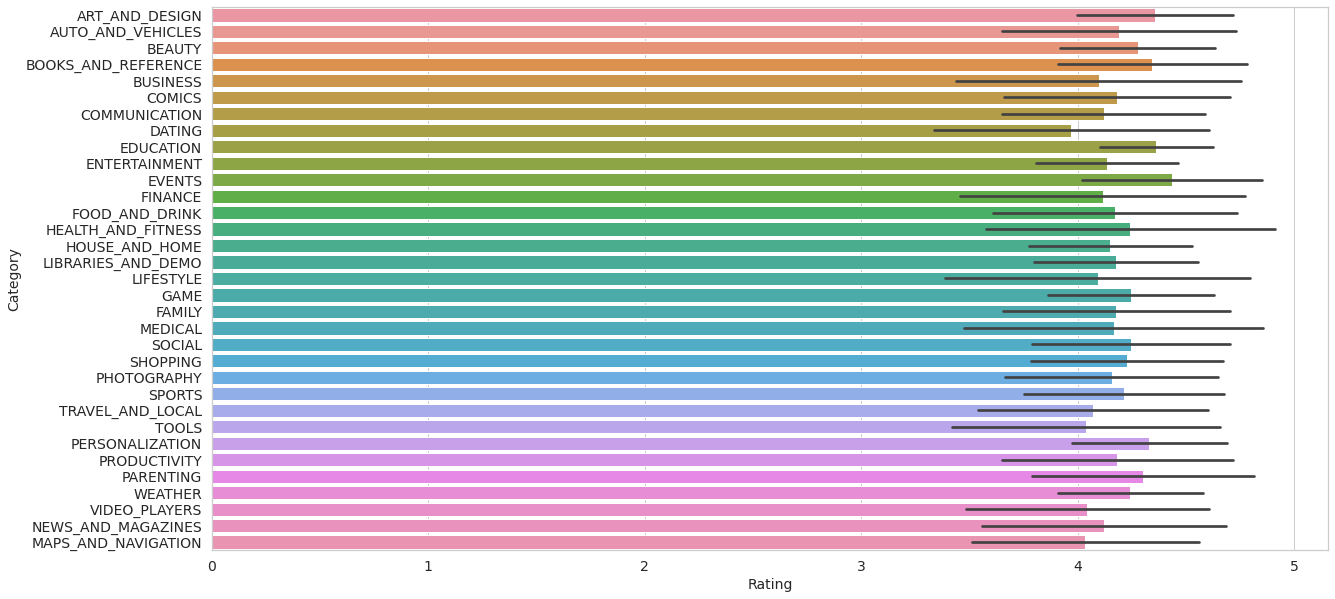

In [26]:
plt.figure(figsize=(20,10))
# topo de cada barra mostra a média das avaliações para cada categoria
# o risco no topo da barra indica seu respectivo desvio padrão (parâmetro ci='sd')
sns.barplot(data=df, x='Rating', y='Category', ci='sd')

In [27]:
# vamos ordernar o barplot pela média das avaliações de cada grupo
order = stats.sort_values(by='mean', ascending=False).index
order

Index(['EVENTS', 'EDUCATION', 'ART_AND_DESIGN', 'BOOKS_AND_REFERENCE',
       'PERSONALIZATION', 'PARENTING', 'BEAUTY', 'GAME', 'SOCIAL', 'WEATHER',
       'HEALTH_AND_FITNESS', 'SHOPPING', 'SPORTS', 'AUTO_AND_VEHICLES',
       'PRODUCTIVITY', 'COMICS', 'FAMILY', 'LIBRARIES_AND_DEMO',
       'FOOD_AND_DRINK', 'MEDICAL', 'PHOTOGRAPHY', 'HOUSE_AND_HOME',
       'ENTERTAINMENT', 'NEWS_AND_MAGAZINES', 'COMMUNICATION', 'FINANCE',
       'BUSINESS', 'LIFESTYLE', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'TOOLS',
       'MAPS_AND_NAVIGATION', 'DATING'],
      dtype='object', name='Category')

Text(0.5, 1.0, 'Avaliações das Categorias')

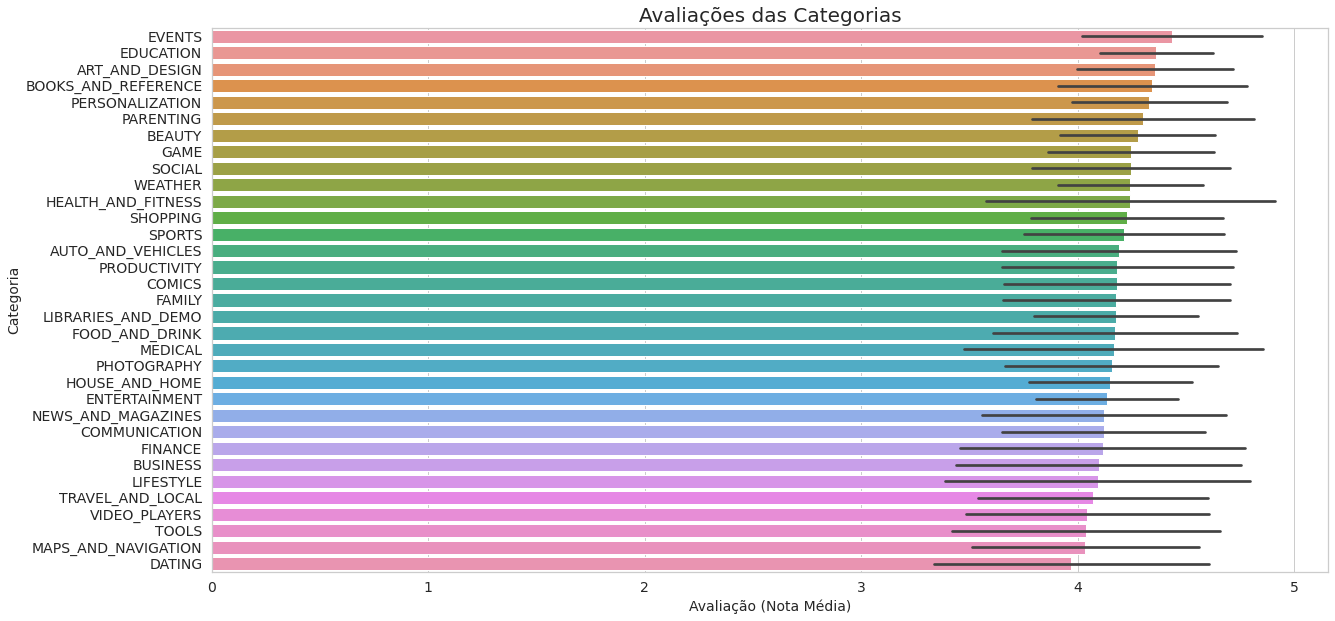

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(data=df, x='Rating', y='Category', ci='sd', order=order)
plt.xlabel('Avaliação (Nota Média)')
plt.ylabel('Categoria')
plt.title('Avaliações das Categorias', fontsize=20)

Ao analisar o boxplot, podemos nota que algumas categorias (p.ex., 'HEALTH_AND_FITNESS') possuem um **desvio padrão** um pouco maior do que as demais categorias. <br/>
Vamos dar uma olhada na distribuição das notas de uma dessas categorias apenas para ter um sentimento do que está acontecendo.

<AxesSubplot:xlabel='Rating'>

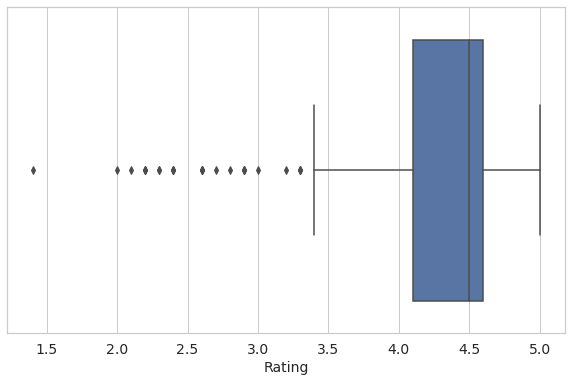

In [29]:
### Vamos analisar a categoria HELATH_AND_FITNESS, pq ela tem um std grande (caso específico)
sns.boxplot(data=df.query('Category == "HEALTH_AND_FITNESS"'), x='Rating')

### 2.5 Como as avaliações se distribuem em cada categoria?
_Variável Numérica_ x _Variável Categórica_.

In [26]:
stats = df.groupby('Category').describe()['Rating']
stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,263.0,4.098479,0.659862,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,256.0,4.121484,0.470260,1.0,4.000,4.2,4.400,5.0
DATING,134.0,3.970149,0.637786,1.0,3.600,4.1,4.400,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9


<AxesSubplot:xlabel='Rating', ylabel='Category'>

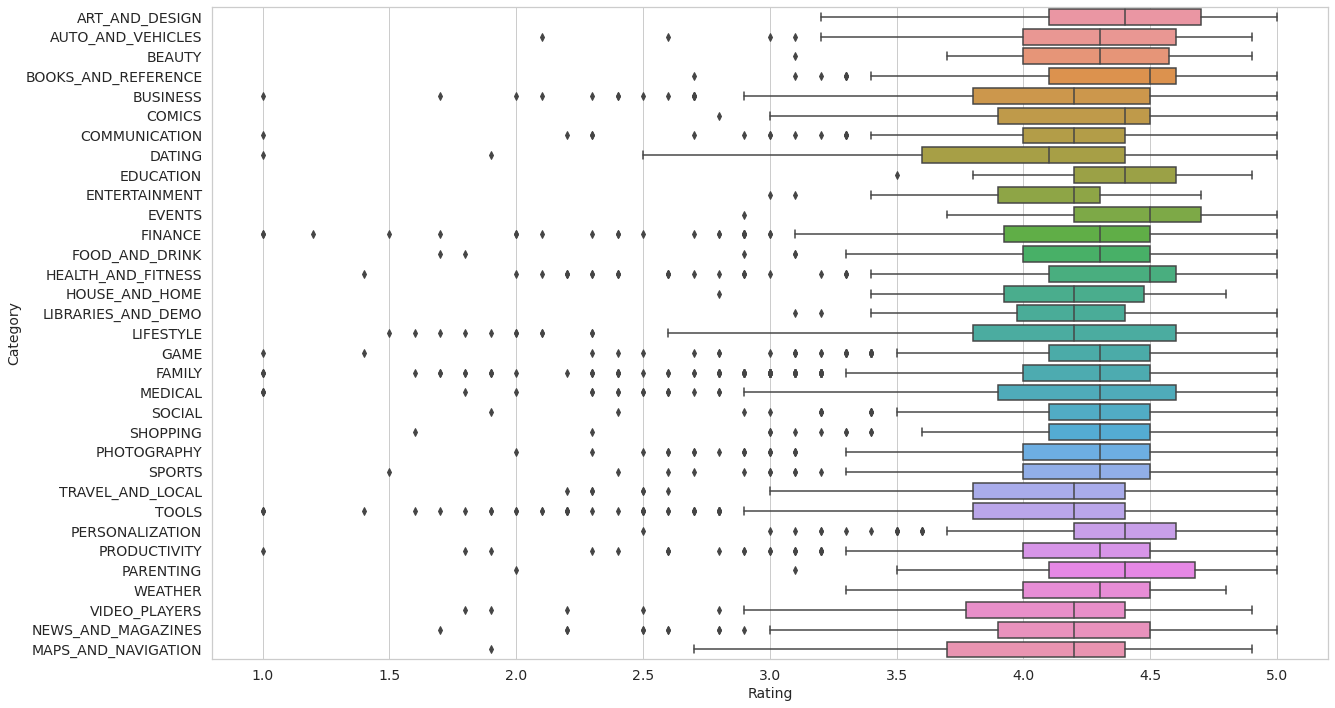

In [30]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='Rating', y='Category')

<AxesSubplot:xlabel='Rating', ylabel='Category'>

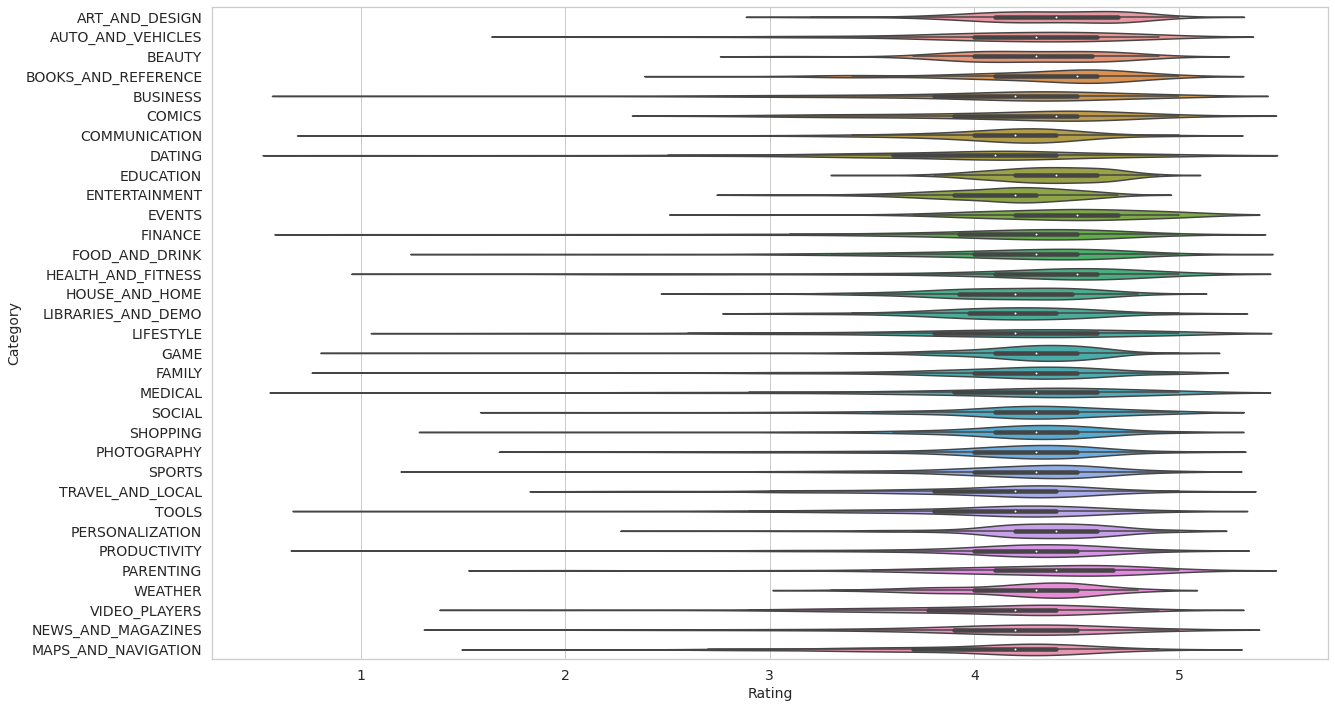

In [35]:
plt.figure(figsize=(20, 12))
sns.violinplot(data=df, x='Rating', y='Category')

Para obter uma análise visual mais interessante, podemos ordenar os boxplots (ou violion plots) de acordo com algum critério. <br/>
Por exemplo, podemos ordená-los pela _mediana_ de cada categoria a fim de analisar, p. ex., como estão distribuídos _a metade dos apps mais bem avaliados_ de cada categoria, além de **diminuir o impacto de outliers** na distribuição.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

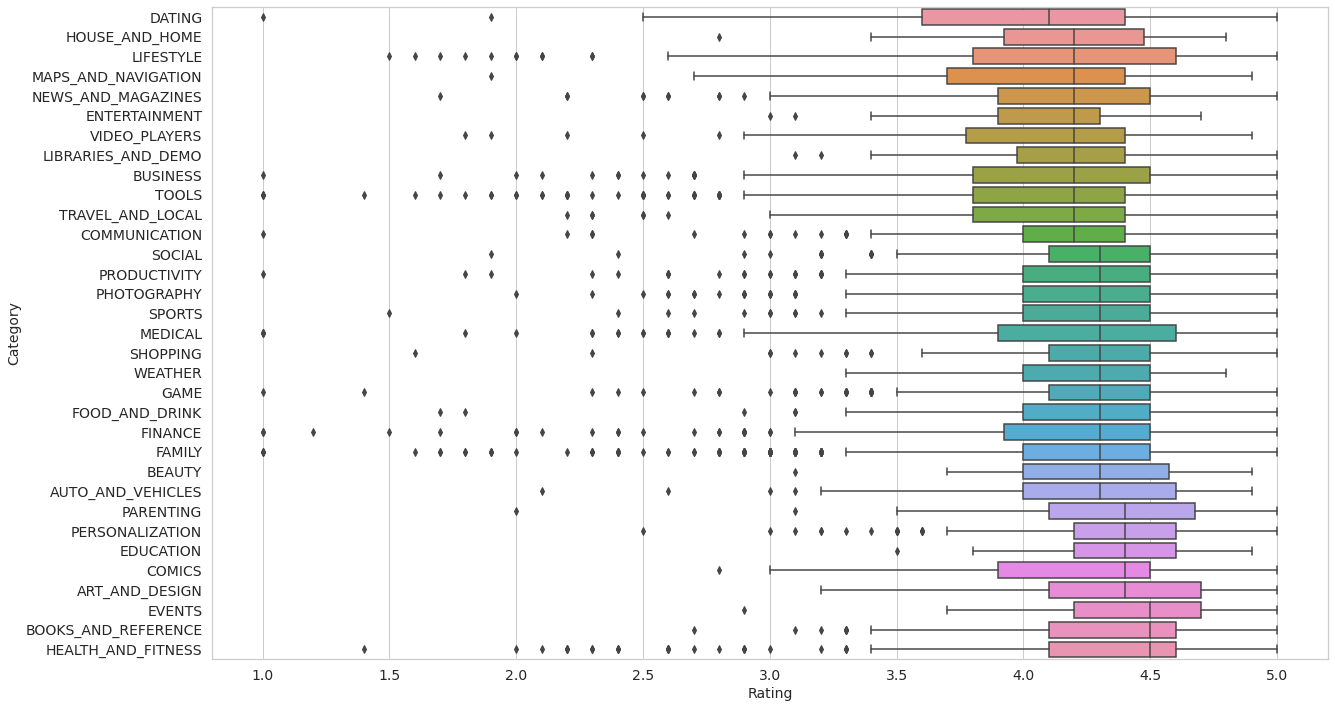

In [33]:
# ordenando pela mediana
order = stats.sort_values(by='50%').index

plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='Rating', y='Category', order=order)

Ao analisar os boxplots, vemos que as categorias *BOOKS_AND_REFERENCE* e *HEALTH_AND_FITNESS* possuem uma quantidade considerável de apps muito bem avaliados --- ~50% de seus apps possuem avaliação >- 4.5. Entretanto, a **variância** (dispersão) de suas avaliações é **muito alta**, vários _outliers_. <br/>

Vamos agora analisar o mesmo gráfico mas com as categorias organizadas pela **média** das avaliações.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

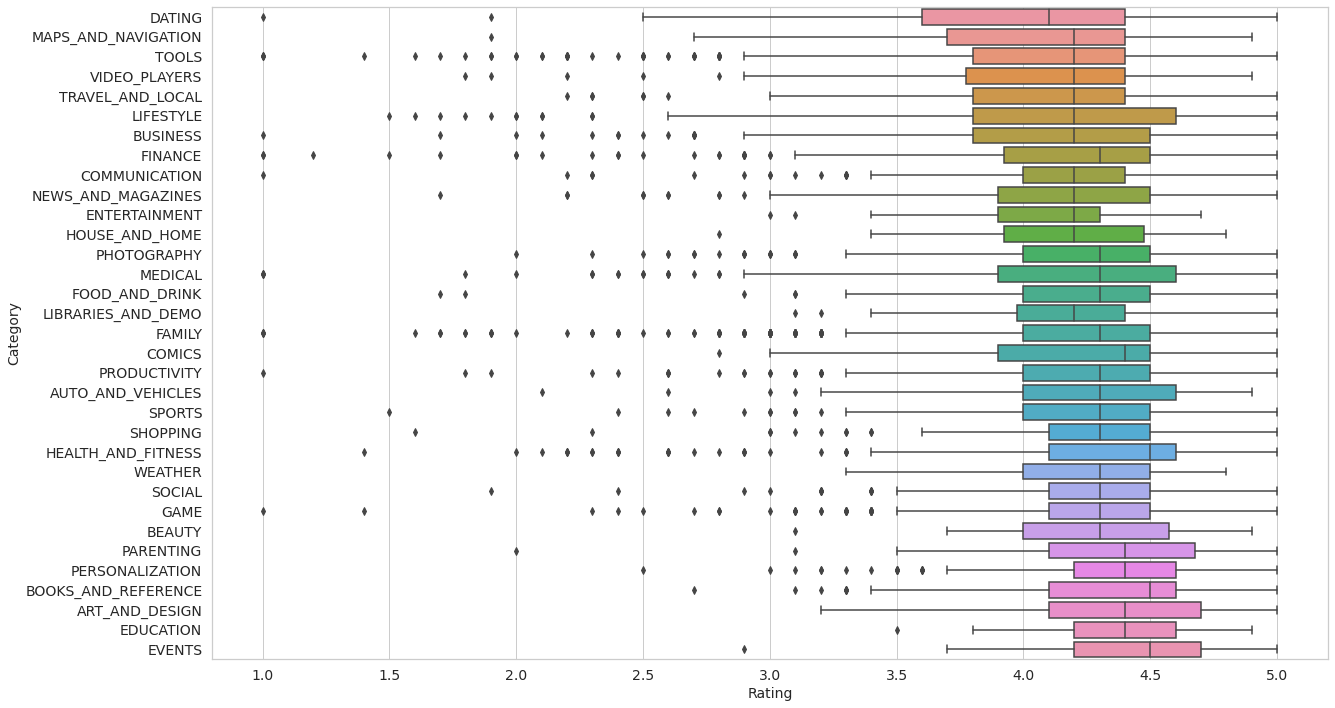

In [37]:
# ordenando pela média
order = stats.sort_values(by='mean').index

plt.figure(figsize=(20, 12))
sns.boxplot(x='Rating', y='Category', data=df, order=order)

Note que como a **média** é _sensível a outliers_, as categorias 'BOOKS_AND_REFERENCES_ e, principalmente, 'HEALTH_AND_FITNESS_ perderam posições. Categorias bem avaliadas e com poucos outliers (p. ex., 'EDUCATION' e 'EVENTS') apresentam médias maiores.

Em resumo, esta maneira de organizar e visualizar este gráfico é interessante quando você quer considerar o impacto dos outliers da variável analisada. A visualização anterior, ordenando pelas medianas, visa o oposto.

### 2.6 Qual a média e distribuição de downloads/instalações dos apps em geral?

#### **CONSIDERANDO OS APPS MAIS POPULATES (_"OUTLIERS"_)**
Vamos considerar que: **Mais popular** significa **mais instalado**

In [38]:
stats = df.describe()
stats

,Rating,Reviews,Size,Installs,Price
count,8194.000000,8.194000e+03,8.194000e+03,8.194000e+03,8194.000000
mean,4.173175,2.553137e+05,2.069274e+07,9.167325e+06,1.037956
std,0.536672,1.985832e+06,2.150960e+07,5.825780e+07,16.859934
min,1.000000,1.000000e+00,8.500000e+03,1.000000e+00,0.000000
25%,4.000000,1.260000e+02,5.500000e+06,1.000000e+04,0.000000
50%,4.300000,3.009500e+03,1.250000e+07,1.000000e+05,0.000000
75%,4.500000,4.383900e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [41]:
print(f"A média geral de instalações é de {stats.loc['mean', 'Installs']:.2f} ± {stats.loc['std', 'Installs']:.2f}")
print(f"A escala do Número de Instalações é de [{stats.loc['min', 'Installs']}, {stats.loc['max', 'Installs']}]")

A média geral de instalações é de 9167325.40 ± 58257799.04
A escala do Número de Instalações é de [1.0, 1000000000.0]


Embora a escala da variável é muito alta ([1, 1B]), note como o **desvio padrão** é consideravelmente alto, o indica que a _distribuição de instalações é bem espalhada_. <br/>


<AxesSubplot:xlabel='Installs'>

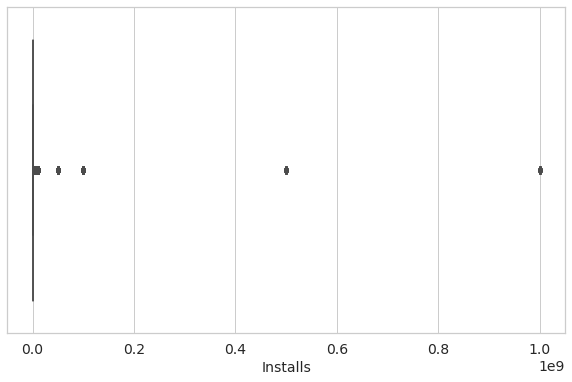

In [45]:
sns.boxplot(data=df, x='Installs')

De acordo com o boxplot acima, temos _uma pequena quantidade de apps_ que possuem uma **quantidade muito alta** de instalações ==> _outliers_. <br/>

In [47]:
# recuperando os 10 apps mais baixados (sem considerar nenhum critério de desempate)
# queremos apenas saber de alguns exemplos
df.sort_values(by='Installs', ascending=False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1873,Instagram,SOCIAL,4.5,66577313,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-31,1.0.0,Varies with device
2377,Google,TOOLS,4.4,8033493,4100000.0,1000000000,Free,0.0,Everyone,Tools,2018-08-03,1.0.0,Varies with device
292,Gmail,COMMUNICATION,4.3,4604324,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,1.0.0,Varies with device
293,Hangouts,COMMUNICATION,4.0,3419249,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,1.0.0,Varies with device
2588,Google Drive,PRODUCTIVITY,4.4,2731171,7000000.0,1000000000,Free,0.0,Everyone,Productivity,2018-08-06,1.0.0,Varies with device
290,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
288,WhatsApp Messenger,COMMUNICATION,4.4,69119316,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,1.0.0,Varies with device
287,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,6100000.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,1.0.0,Varies with device
2290,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,19000000.0,1000000000,Free,0.0,Everyone,Travel & Local,2018-07-31,1.0.0,Varies with device
1882,Google+,SOCIAL,4.2,4831125,9900000.0,1000000000,Free,0.0,Teen,Social,2018-07-26,1.0.0,Varies with device


De fato, os outliers são aplicativos extremamente populares e baixados.

Podemos então fazer alguns tipos de análise frente a esta situação:
- Analisamos como os outliers (apps mais instalados) se comportam
- Analisamos os apps menos instalados (desconsideramos os outliers)

Para descobrir os outliers, poderíamos analisar o _boxplot_ e simplesmente "chutar" qual é o intervalo de valores que os outliers se encontram. <br/>
Porém, uma forma mais interessante é utilizar, inicialmente, o **método de detecçao de outliers pelo IQR**, que é justamente o método utilizado pelo boxplot acima.

In [48]:
Q1 = stats.loc['25%', 'Installs']
Q3 = stats.loc['75%', 'Installs']

IQR = Q3 - Q1

# intervalo sem outliers
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR


print(f'Q1 = {Q1}')
print(f'Q3 = {Q3}')
print(f'IQR = {IQR}')
print(f'Intervalo sem outliers: [{lower_bound}, {upper_bound}]')

Q1 = 10000.0
Q3 = 1000000.0
IQR = 990000.0
Intervalo sem outliers: [-1475000.0, 2485000.0]


Como o número mínimo de instalações é 0, nosso **intervalo sem outliers real** é **[0, 2485000]**. <br/>
Assim, os apps mais populares, com mais de 2485000 instalações, são considerados _outliers_.

In [50]:
apps_mais_populares = df.query('Installs > @upper_bound')
apps_mais_populares

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,1.0.0,4.2 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20000000.0,10000000,Free,0.0,Teen,Art & Design,2018-04-02,3.8,4.1 and up
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216,39000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-03,2.2.5,4.0.3 and up
19,ibis Paint X,ART_AND_DESIGN,4.6,224399,31000000.0,10000000,Free,0.0,Everyone,Art & Design,2018-07-30,5.5.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8127,PhotoFunia,PHOTOGRAPHY,4.3,316378,4400000.0,10000000,Free,0.0,Everyone,Photography,2017-06-03,4.0.7.0,2.3 and up
8152,Modern Strike Online,GAME,4.3,834117,44000000.0,10000000,Free,0.0,Teen,Action,2018-07-30,1.25.4,4.1 and up
8155,Big Hunter,GAME,4.3,245455,84000000.0,10000000,Free,0.0,Everyone 10+,Action,2018-05-31,2.8.6,4.0 and up
8182,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,9900000.0,5000000,Free,0.0,Mature 17+,Social,2018-03-23,1.0.0,Varies with device


Temos um total de **1978** apps com mais de **2485000** instalações.

#### **Analisando os apps mais populares**

In [51]:
stats_apps_mais_populares = apps_mais_populares.describe()
stats_apps_mais_populares

,Rating,Reviews,Size,Installs,Price
count,1978.000000,1.978000e+03,1.978000e+03,1.978000e+03,1978.000000
mean,4.289130,1.029147e+06,2.687222e+07,3.706016e+07,0.004034
std,0.293063,3.943505e+06,2.430535e+07,1.141864e+08,0.158725
min,2.000000,6.600000e+01,4.100000e+04,5.000000e+06,0.000000
25%,4.200000,7.912975e+04,9.200000e+06,5.000000e+06,0.000000
50%,4.300000,2.104255e+05,1.800000e+07,1.000000e+07,0.000000
75%,4.500000,6.201300e+05,4.000000e+07,1.000000e+07,0.000000
max,4.900000,7.815831e+07,1.000000e+08,1.000000e+09,6.990000


In [52]:
print(f"A qtde de apps mais populares (número de instalações > 2485000.0) é de {apps_mais_populares.shape[0]}")
print(f"A média geral de instalações é de {stats_apps_mais_populares.loc['mean', 'Installs']:.2f} ± {stats_apps_mais_populares.loc['std', 'Installs']:.2f}")
print(f"A mediana de instalações é de {stats_apps_mais_populares.loc['50%', 'Installs']:.2f}")

A qtde de apps mais populares (número de instalações > 2485000.0) é de 1978
A média geral de instalações é de 37060161.78 ± 114186396.08
A mediana de instalações é de 10000000.00


O **desvio padrão** dos _apps mais populares_ continua bem alto, o que indica que a distribuição do número de instalações é bem espalhada. <br/>
Além disso, note que a **média** e **mediana** do número de instalações são _muito diferentes_.

([<matplotlib.axis.XTick at 0x7f20e195b4c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

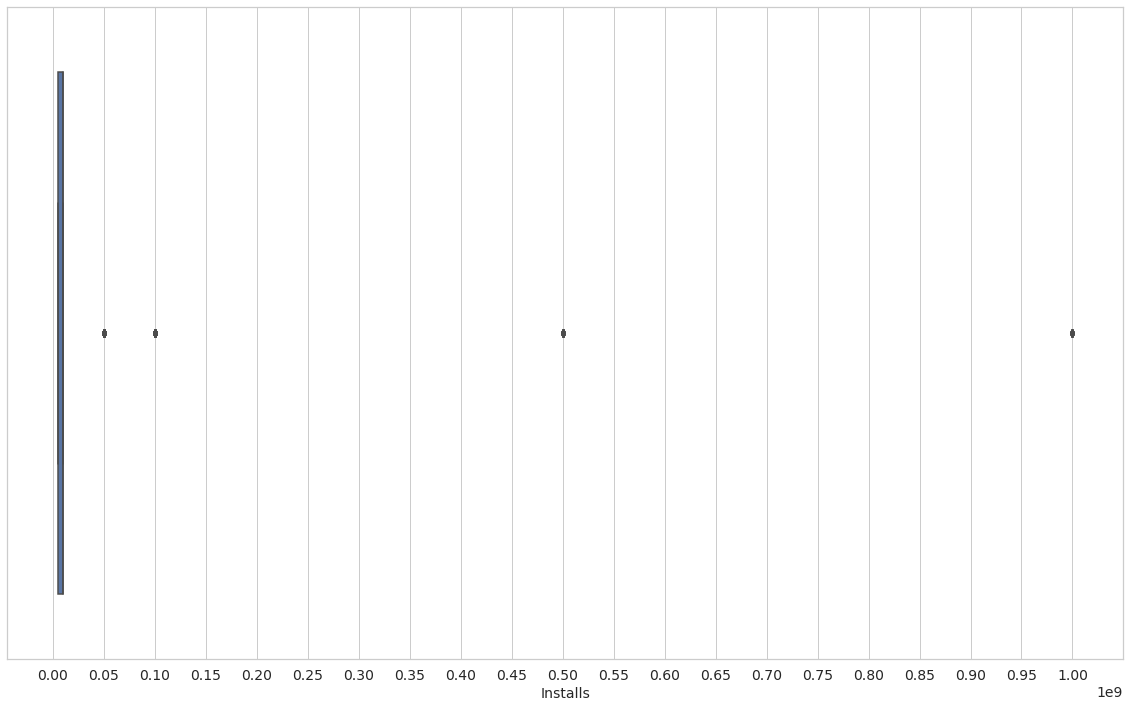

In [53]:
plt.figure(figsize=(20, 12))

sns.boxplot(data=apps_mais_populares, x='Installs')
plt.xticks(np.arange(0.0e9, 1.0001e9, 0.05e9))  # alterando os ticks do eixo x para uma melhor visualização

Note que, mesmo entre os _aplicativos mais populares_ -- aqueles que possuem **número de instalações maior que 2485000** -- há alguns que estrapolam o número de instalações (**_outliers_**). <br/>
Pelo boxplot, é possível chutar que qualquer app com mais do que 50M (0.05e9) são de fato **_outliers_**. <br/>

Vamos analisar o **histograma** dos apps mais populares.

([<matplotlib.axis.XTick at 0x7f20e18c7dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

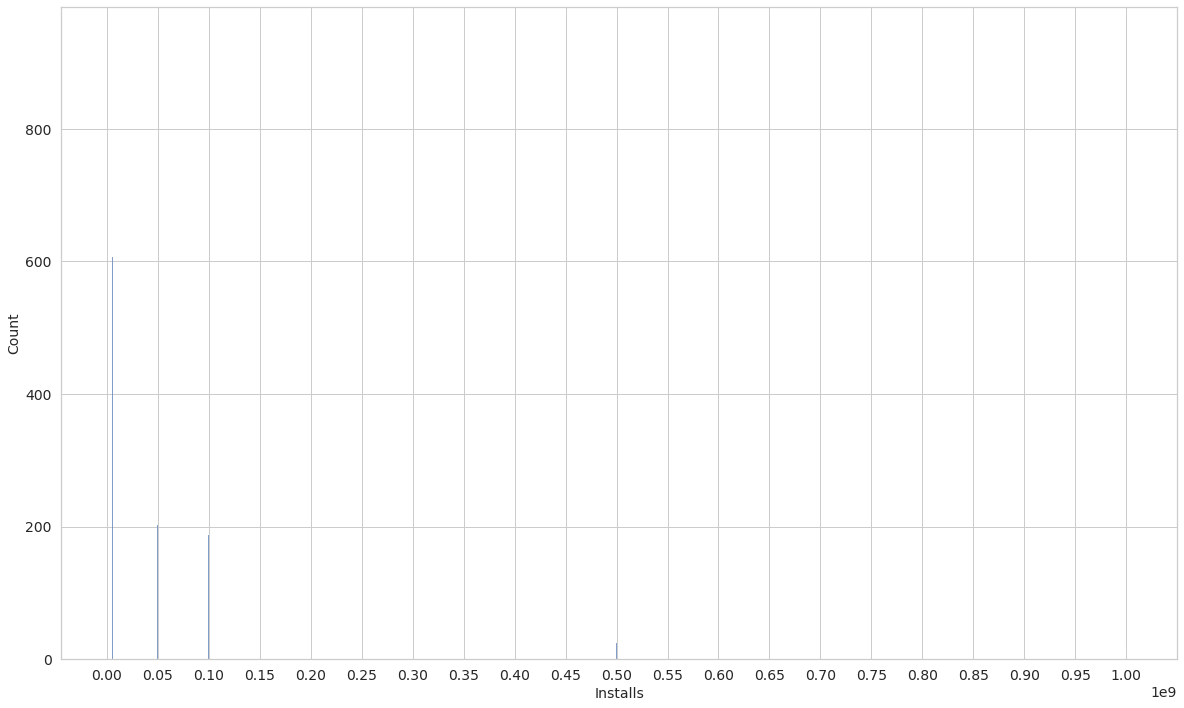

In [54]:
plt.figure(figsize=(20, 12))

sns.histplot(data=apps_mais_populares, x='Installs')
plt.xticks(np.arange(0.0, 1.0001e9, 0.05e9))

De fato, vemos que a maior parte dos apps mais populares possuem número de instalações inferior a 50M (0.05e9). <br/>

Poderíamos estabelecer um **novo intervalo** de número de instalações para detectar _outliers_ (apps mais populares). O novo intervalo poderia ser **[0, 50000000]**, ao invés de [0, 2485000]. <br/>
Consequentemente, diminuiríamos o número de apps inicialmente considerados outliers e aumentaríamos a quantidade dos apps "normais" (menos populares). <br/>

O problema é que, provavelmente, estes _apps removidos dos outliers iniciais_ serão **outliers** na nova amostra de apps "normais". <br/>
Analisemos o boxplot deste conjunto:

Text(0.5, 1.0, 'Distribuição do Número de Instalações para os Novos "Outliers"')

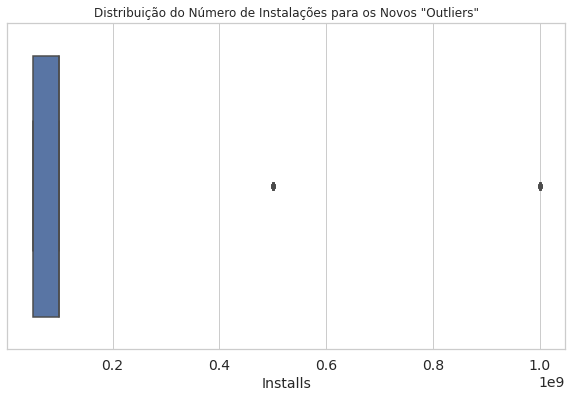

In [59]:
# boxplot dos novos "outliers"
# agora, qualquer app com número de instalações maior ou igual a 50000000 será considerado outlier (antes o upper bound era 2485000)
sns.boxplot(data=df.query('Installs >= 50000000'), x='Installs')
plt.title('Distribuição do Número de Instalações para os Novos "Outliers"')

Ainda temos 'outliers' dentro da amostra de **'novos outliers'** ==> alta variância.

Text(0.5, 1.0, 'Distribuição do Número de Instalações para a nova amostra SEM outliers')

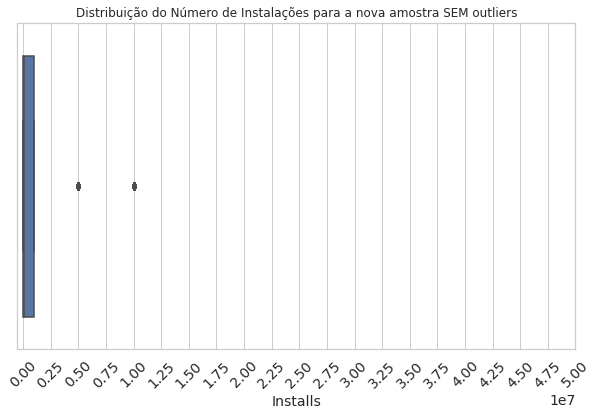

In [60]:
# boxplot dos apps "normais" (sem outliers)
# agora, qualquer app com número de instalações MENOR do que 50000000 NÃO será considerado outlier (antes o upper bound era 2485000)
sns.boxplot(data=df.query('Installs < 50000000'), x='Installs')
plt.xticks(np.arange(0, 5.001e7, 0.25e7), rotation=45)
plt.title('Distribuição do Número de Instalações para a nova amostra SEM outliers')

No _novo conjunto de apps menos populares_, temos agora **outliers**, que  são, justamente, os novos apps considerados. <br/>

Dado este dilema, vamos adotar a seguinte estratégia: <br/>
- Como o **conjunto de apps mais populares** (outliers iniciais) continuam com **alta variância** no _número de instalações_, independente se removermos seus apps com menos de 50M instalações, **manteremos** o conjunto de outliers originalmente obtidos como está. <br/>
- Isso porque, neste momento, estamos interessados _apenas_ na análise de uma **única variável: _Installs_**. <br/>
- Desta forma, mantemos um conjunto de apps de fato _sem outliers_ (apps menos populares) para uma análise menos "ruidosa".

Uma estratégia mais interessante ao querer confrontar/analisar **o número de instalações** com outra variável é agrupar os apps, de acordo com suas quantidades de downloads, em uma **nova variável categórica**. <br/>
Isso tende _a facilitar nossa análise_, p. ex., isolando grupos de apps com números exorbitantes de instalação. <br/>
Veremos isso jajá!

#### **Analisando a quantidade de instalação dos apps menos populares (menos instalados)**

In [62]:
upper_bound  # upper bound dos apps menos populares

2485000.0

In [63]:
# seleciona todos os apps com número de instalação entre [0, upper_bound] ==> [0, 2485000.0]
apps_menos_populares = df.query('Installs <= @upper_bound')
apps_menos_populares

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619000.0,1000,Free,0.0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up
8189,FR Calculator,FAMILY,4.0,7,2600000.0,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
8190,Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
8191,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up


In [64]:
stats_apps_menos_populares = apps_menos_populares.describe()
stats_apps_menos_populares

,Rating,Reviews,Size,Installs,Price
count,6216.000000,6216.000000,6.216000e+03,6216.000000,6216.000000
mean,4.136277,9071.399453,1.872636e+07,291516.141892,1.366961
std,0.588830,22620.037305,2.014875e+07,406097.228321,19.346041
min,1.000000,1.000000,8.500000e+03,1.000000,0.000000
25%,3.900000,56.000000,4.500000e+06,5000.000000,0.000000
50%,4.200000,656.000000,1.100000e+07,50000.000000,0.000000
75%,4.500000,7006.000000,2.500000e+07,500000.000000,0.000000
max,5.000000,376223.000000,1.000000e+08,1000000.000000,400.000000


In [66]:
print(f"A qtde de apps menos populares (número de instalações <= 2485000.0) é de {apps_menos_populares.shape[0]}")
print(f"A média de instalações é de {stats_apps_menos_populares.loc['mean', 'Installs']:.2f} ± {stats_apps_menos_populares.loc['std', 'Installs']:.2f}")
print(f"A mediana de instalações é de {stats_apps_menos_populares.loc['50%', 'Installs']:.2f}")

A qtde de apps menos populares (número de instalações <= 2485000.0) é de 6216
A média de instalações é de 291516.14 ± 406097.23
A mediana de instalações é de 50000.00


O **desvio padrão** das instalações ainda é consideravelmente alto, mas bem menor do que para os _apps mais instalados_. <br/>
A diferença entre a **média** e a **mediana** das instalações é _menor_ do que para os _apps mais instalados_ também. <br/>

Apenas analisando estas estatísticas descritivas, percebemos que os números de instalação destes apps são bem distribuídas, mas em um intervalo bem menor do que para _apps mais instalados_.

<AxesSubplot:xlabel='Installs'>

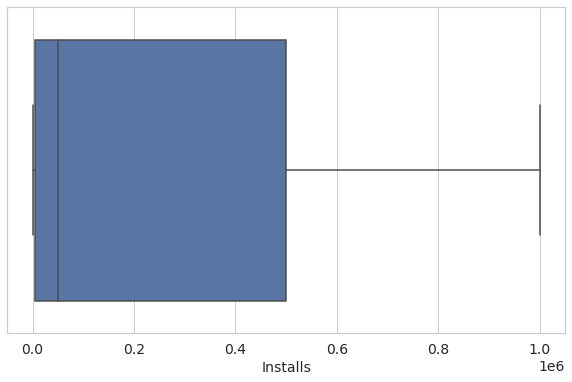

In [67]:
sns.boxplot(data=apps_menos_populares, x='Installs')

Dos apps menos populares:
- **25% (Q1)** possuem apps com número de instalações **<= 5000** (veja a tabela de describe)
- **50% (Q2 - mediana)** possuem apps com número de instalações **<= 50000** (veja a tabela de describe)
- **75% (Q3)** possuem apps com número de instalações **<= 500000** (veja a tabela de describe)
- **25%** possuem apps com número de instalações **> 500000 e <= 1M**

- **25%** possuem apps com número de instalações espalhados no intervalo de **[Q1, Q2] ==> [5000, 50000]**
- **25%** possuem apps com número de instalações espalhados no intervalo de **[Q2, Q3] ==> [50000, 500000]**
  + **maior variância (dispersão)** dos dados do que o caso anterior

<AxesSubplot:xlabel='Installs'>

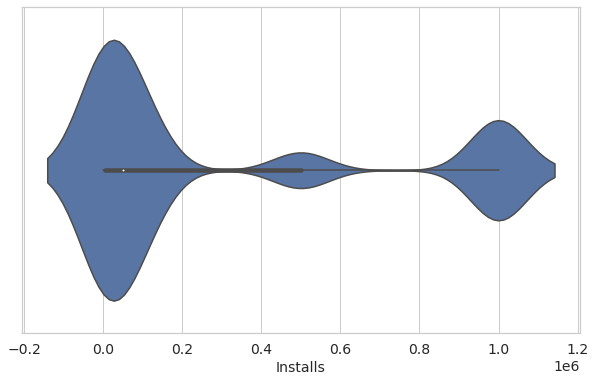

In [68]:
sns.violinplot(x='Installs', data=apps_menos_populares)

Dos **25% de apps mais instalados**, a maioria deles possuem número de instalações perto de **1M**.

### 2.7 Criando grupos para a quantidade de instalações 
Vamos agrupar os aplicativos de acordo com seus **números de instalações**. <br/>
Este processo é conhecido como **segmentação**: criaremos intervalores de valores (bins) para representar cada grupo. <br/>
Em outras palavras, segmentaremos o intervalo original, de modo que cada grupo terá um segmento (sub-intervalo).

Vamos adotar as seguintes categorias/grupos para o **número de instalações**:
- **Muito Baixo**: [0, 1k] instalações
- **Baixo**: (1k, 10k] instalações
- **Médio**: (10k, 100k] installações 
- **Alto**: (100k, 1M]
- **Muito Alto**: (1M, 100M]
- **Extremamente Alto**: (100M,)

PS: esta é apenas uma sugestão de segmentação. Outras opções poderiam ser levadas em conta.

Para criar estas categorias (segmentos, bins) a partir de intervalos numéricos, podemos utilizar o método `pd.cut()` do pandas: # https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [70]:
df['Installs (Category)'] = pd.cut(df['Installs'], bins=[0, 1e3, 1e4, 1e5, 1e6, 1e8, 1e12], labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto', 'Extremamente Alto'], include_lowest=True)

df[['App', 'Installs', 'Installs (Category)']]

,App,Installs,Installs (Category)
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000,Baixo
1,Coloring book moana,500000,Alto
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,Muito Alto
3,Sketch - Draw & Paint,50000000,Muito Alto
4,Pixel Draw - Number Art Coloring Book,100000,Médio
...,...,...,...
8189,FR Calculator,500,Muito Baixo
8190,Sya9a Maroc - FR,5000,Baixo
8191,Fr. Mike Schmitz Audio Teachings,100,Muito Baixo
8192,The SCP Foundation DB fr nn5n,1000,Muito Baixo


In [74]:
# contagem de apps de acordo com seu grupo de número de instalações
df['Installs (Category)'].value_counts()

Muito Alto           1934
Alto                 1919
Médio                1551
Baixo                1411
Muito Baixo          1335
Extremamente Alto      44
Name: Installs (Category), dtype: int64

In [72]:
# contingency table ==> Tabela de Contingência: conta a quantidade de registros por categoria e variáveis
count = df['Installs (Category)'].value_counts()
perc = (count * 100) / df.shape[0]

pd.DataFrame(data={
    'count': count,
    'perc (%)': perc.round(2)
}, index=count.index)

,count,perc (%)
Muito Alto,1934,23.60
Alto,1919,23.42
Médio,1551,18.93
Baixo,1411,17.22
Muito Baixo,1335,16.29
Extremamente Alto,44,0.54


In [75]:
# Vamos checar estatísticas descritivas para o número de instalações em cada grupo
df.groupby('Installs (Category)').describe()[['Installs']]

Installs                                           \
                       count          mean           std          min   
Installs (Category)                                                     
Muito Baixo           1335.0  6.212270e+02  4.185719e+02          1.0   
Baixo                 1411.0  8.493976e+03  2.294721e+03       5000.0   
Médio                 1551.0  8.526757e+04  2.280158e+04      50000.0   
Alto                  1919.0  8.686816e+05  2.200907e+05     500000.0   
Muito Alto            1934.0  2.135729e+07  2.887539e+07    5000000.0   
Extremamente Alto       44.0  7.272727e+08  2.518431e+08  500000000.0   

                                                                           
                             25%          50%           75%           max  
Installs (Category)                                                        
Muito Baixo                100.0       1000.0  1.000000e+03  1.000000e+03  
Baixo                     5000.0      10000.0  1.000000e+04  1.000000e+04  
Médio                    50000.0     100000.0  1.000000e+05  1.000000e+05  
Alto                    500000.0    1000000.0  1.000000e+06  1.000000e+06  
Muito Alto             5000000.0   10000000.0  1.000000e+07  1.000000e+08  
Extremamente Alto    500000000.0  500000000.0  1.000000e+09  1.000000e+09

Text(0.5, 1.0, 'Número de Apps de acordo com a quantidade de instalações')

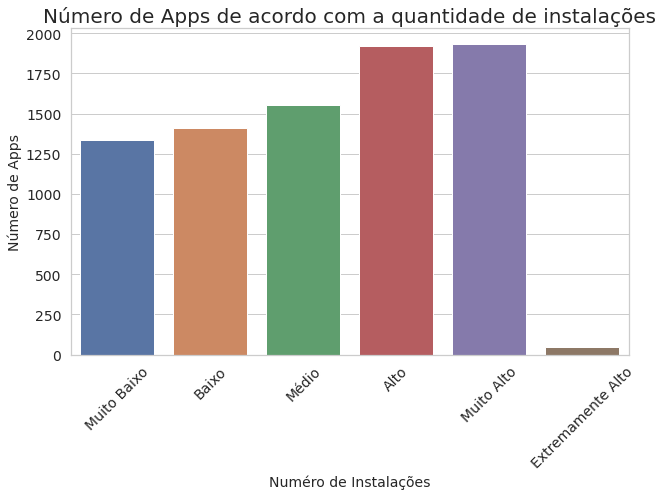

In [76]:
sns.countplot(data=df, x='Installs (Category)')
plt.xlabel('Numéro de Instalações')
plt.ylabel('Número de Apps')
plt.xticks(rotation=45)
plt.title('Número de Apps de acordo com a quantidade de instalações', fontsize=20)

Após a segmentação/agrupamento, conseguimos notar que os dois maiores grupos possuem um número **alto** ou **muito alto** de instalações, enquanto apenas um pequeno número de aplicativos possui um valor **extremamente alto** de instalações. <br/>
Mais quais são esses números?

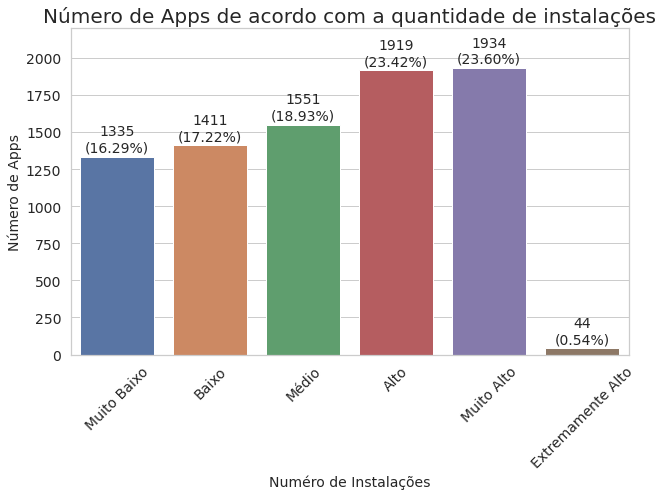

In [77]:
ax = sns.countplot(data=df, x='Installs (Category)')
plt.xlabel('Numéro de Instalações')
plt.ylabel('Número de Apps')
plt.xticks(rotation=45)
plt.ylim([0, 2200])  # para caber as anotações
plt.title('Número de Apps de acordo com a quantidade de instalações', fontsize=20)

#### ADICIONANDO A CONTAGEM DE APPS SUAS PORCENTAGENS PARA CADA GRUPO (BARRA)
n_registros = df.shape[0]

# iterando para cada barra do gráfico
for bar in ax.patches:
    freq = bar.get_height()
    ax.annotate(f'{freq}\n({(freq * 100) / n_registros:.2f}%)',  # string a ser impressa
                (bar.get_x() + bar.get_width() / 2, bar.get_height() + 60),  # posição inicial a ser impressa (x, y)
                ha='center', va='center',
                size=14, xytext=(0, 8),
                textcoords='offset points')

#### Pie plot

In [80]:
perc

Muito Alto           23.602636
Alto                 23.419575
Médio                18.928484
Baixo                17.219917
Muito Baixo          16.292409
Extremamente Alto     0.536978
Name: Installs (Category), dtype: float64

<AxesSubplot:ylabel='Installs (Category)'>

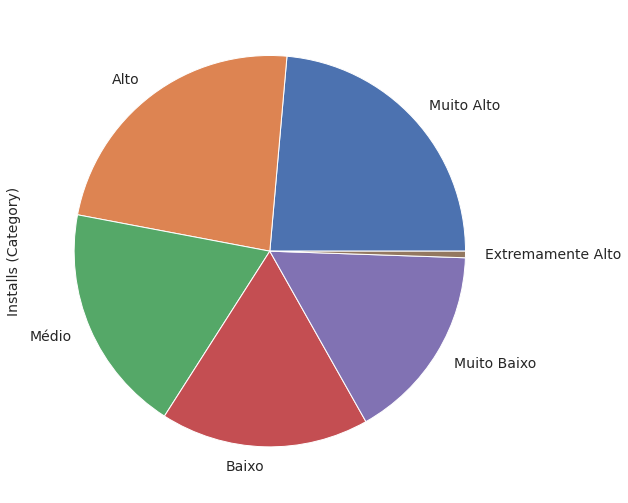

In [81]:
count.plot.pie(figsize=(18, 9), fontsize=14)

O uso do gráfico de pizza é um pouco _controverso_, uma vez que as **diferenças entre áreas** não são tão perceptíveis do que as **diferenças entre alturas** em um gráfico de barras. <br/>
P. ex., por este gráfico, como saber qual área é maior: _Alto_ ou _Muito Alto_??? _Médio_ ou _Baixo_? <br/>
Desta maneira, no geral o **gráfico de barras** é preferível.

Mas, podemos tentar melhorar o gráfico de pizza adicionando os números de registros de cada fatia:

<AxesSubplot:ylabel='Installs (Category)'>

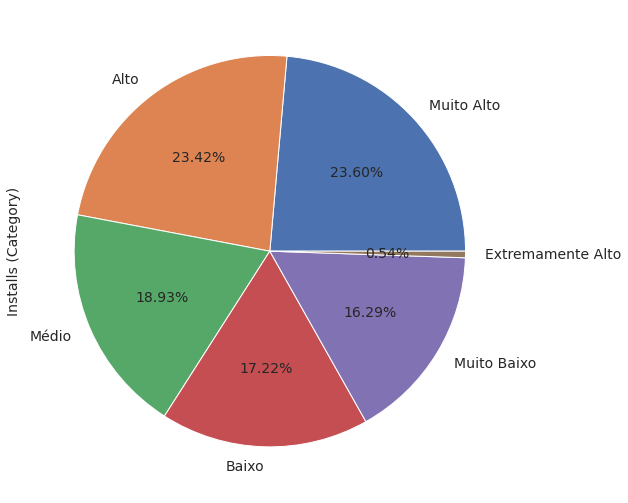

In [82]:
# o parâmetro autopct='%.2f%%' adiciona a porcentagem de cada pedaço da pizza
count.plot.pie(autopct='%.2f%%', figsize=(18, 9), fontsize=14)

### 2.8 Qual é a proporção de apps Free e Paid?

In [83]:
count = df['Type'].value_counts()
perc = (count * 100) / df.shape[0]

contingency_table = pd.DataFrame({
    'count': count,
    'perc (%)': perc.round(2)
}, index=count.index)

contingency_table

,count,perc (%)
Free,7591,92.64
Paid,603,7.36


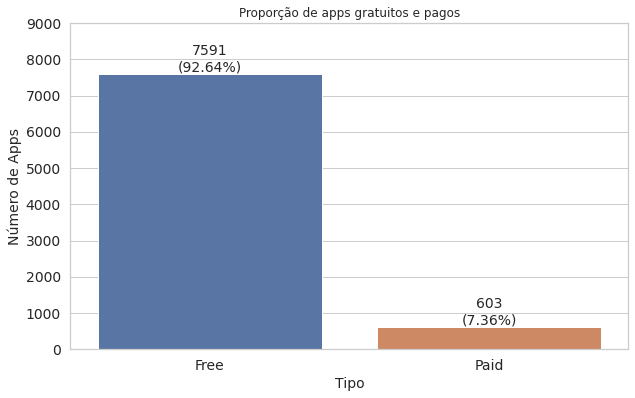

In [84]:
ax = sns.countplot(x='Type', data=df)
plt.xlabel('Tipo')
plt.ylabel('Número de Apps')
plt.ylim([0, 9000])  # para caber as anotações
plt.title('Proporção de apps gratuitos e pagos')

n_registros = df.shape[0]

for bar in ax.patches:
    freq = bar.get_height()
    ax.annotate(f'{freq}\n({(freq * 100) / n_registros:.2f}%)',  # string a ser impressa
                (bar.get_x() + bar.get_width() / 2, bar.get_height() + 200),  # posição inicial a ser impressa (x, y)
                ha='center', va='center',
                size=14, xytext=(0, 8),
                textcoords='offset points')

<AxesSubplot:ylabel='Type'>

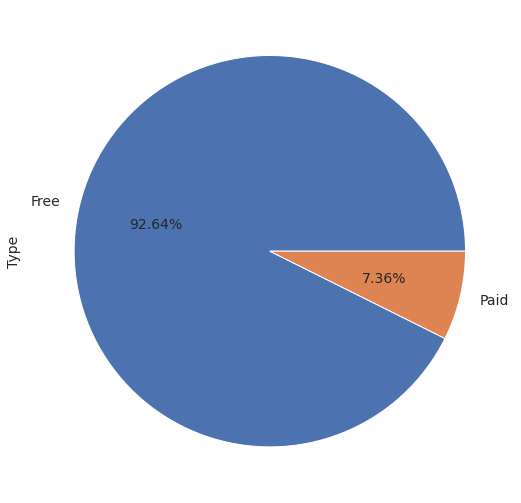

In [85]:
count.plot.pie(autopct='%.2f%%', figsize=(18, 9), fontsize=14)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

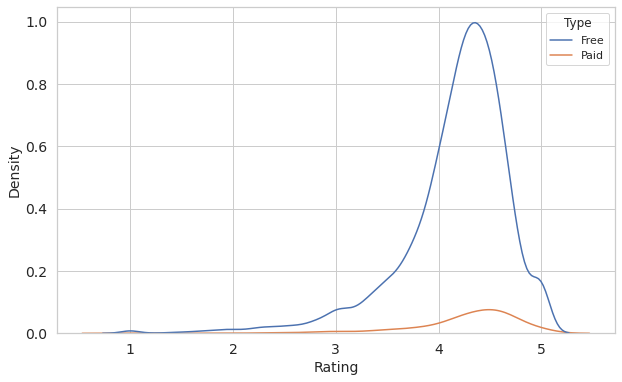

In [62]:
sns.kdeplot(x='Rating', data=df, hue='Type')

### 2.9 Qual é avaliação média de cada tipo de aplicativo?
Variável numérica x Variável Categórica.

In [87]:
df.groupby('Type').mean()['Rating']

Type
Free    4.166329
Paid    4.259370
Name: Rating, dtype: float64

In [88]:
stats = df.groupby('Type').describe()['Rating']
stats

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,7591.0,4.166329,0.534185,1.0,4.0,4.3,4.5,5.0
Paid,603.0,4.259370,0.560396,1.0,4.1,4.4,4.6,5.0


In [90]:
print(f"A média de avaliações de aplicativos gratuitos é de {stats.loc['Free', 'mean']:.2f} ± {stats.loc['Free', 'std']:.2f}, e mediana {stats.loc['Free', '50%']:.2f}")
print(f"A média de avaliações de aplicativos pagos é de {stats.loc['Paid', 'mean']:.2f} ± {stats.loc['Paid', 'std']:.2f}, e mediana {stats.loc['Paid', '50%']:.2f}")

A média de avaliações de aplicativos gratuitos é de 4.17 ± 0.53, e mediana 4.30
A média de avaliações de aplicativos pagos é de 4.26 ± 0.56, e mediana 4.40


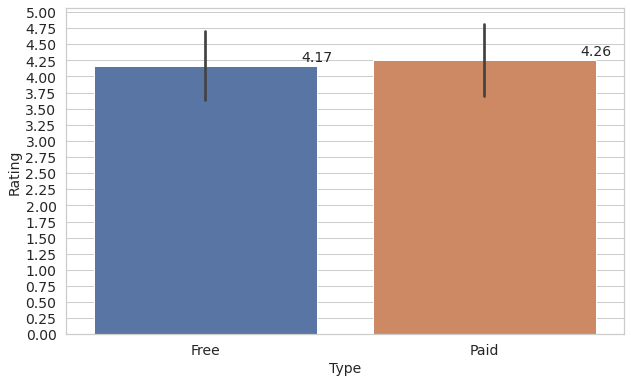

In [100]:
ax = sns.barplot(data=df, x='Type', y='Rating', ci='sd')
plt.yticks(np.arange(0, 5.01, 0.25))

for bar in ax.patches:
    media = bar.get_height()
    ax.annotate(f'{media:.2f}',
                (bar.get_x() + bar.get_width(), bar.get_height()),  # posição inicial a ser impressa (x, y)
                 ha='center', va='center',
                 size=14, xytext=(0, 8),
                 textcoords='offset points')

#### VISUALIZANDO A DISTRIBUIÇÃO DE NOTAS POR APLICATIVO

<AxesSubplot:xlabel='Rating', ylabel='Count'>

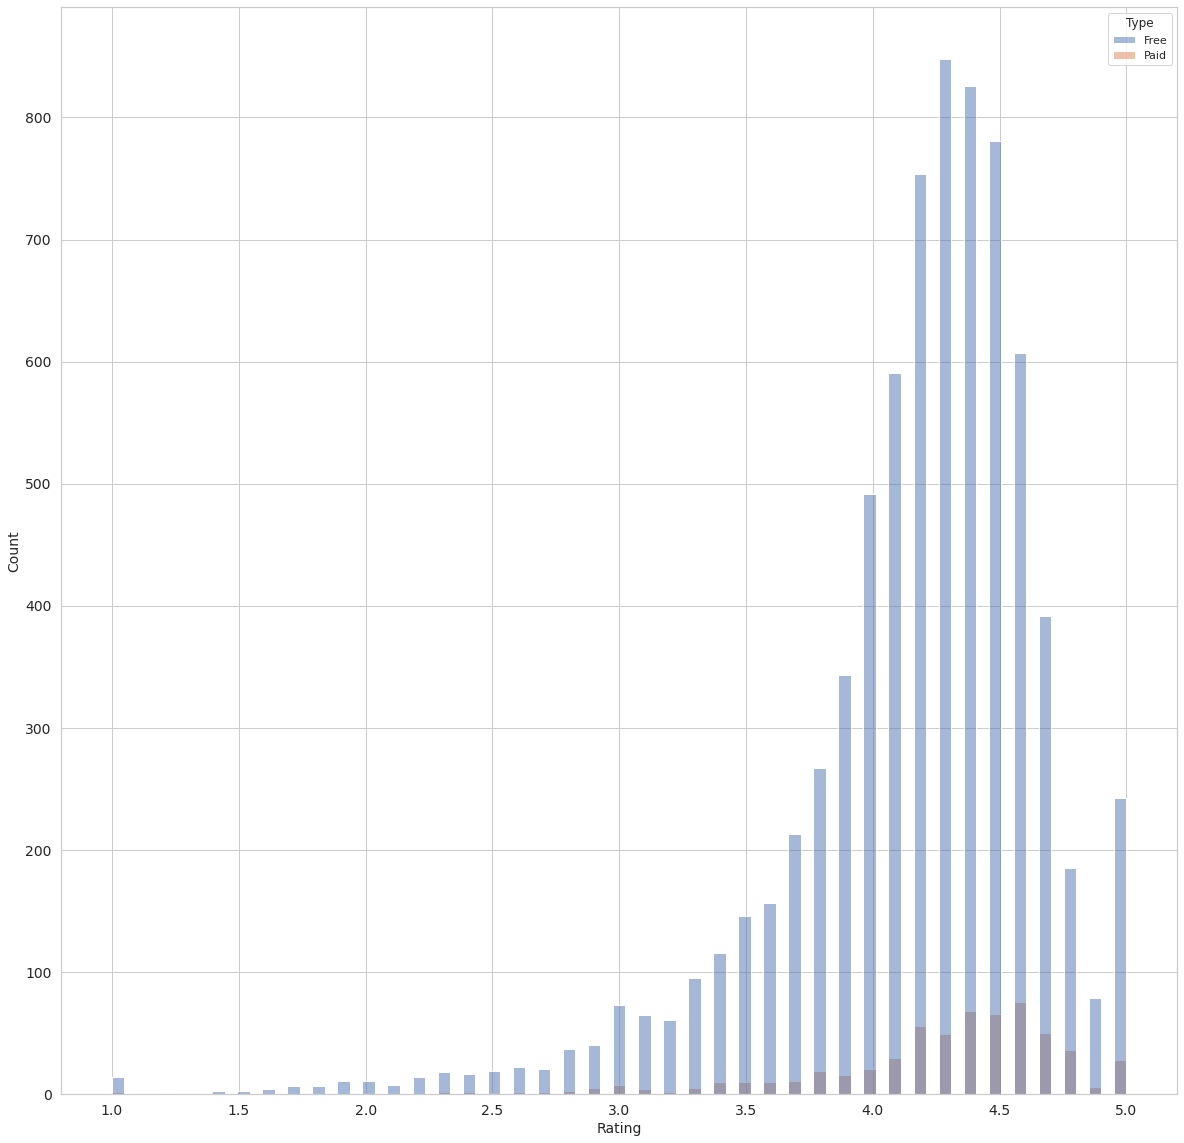

In [101]:
plt.figure(figsize=(20, 20))
sns.histplot(data=df, x='Rating', hue='Type')

Text(0, 0.5, 'Tipo')

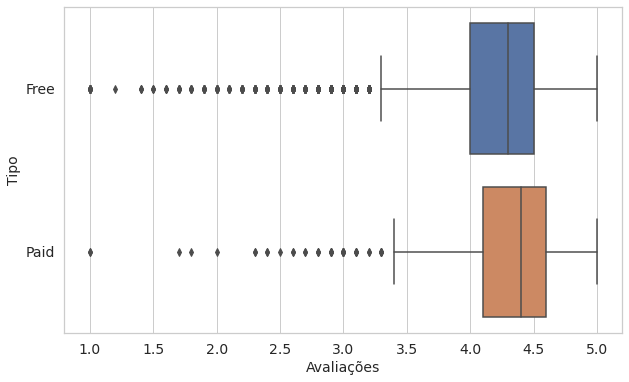

In [102]:
sns.boxplot(data=df, x='Rating', y='Type')
plt.xlabel('Avaliações')
plt.ylabel('Tipo')

Text(0, 0.5, 'Tipo')

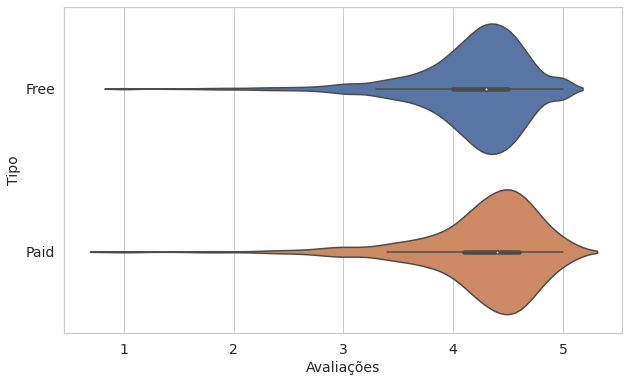

In [103]:
sns.violinplot(data=df, x='Rating', y='Type')
plt.xlabel('Avaliações')
plt.ylabel('Tipo')

##### RIDGE LINE

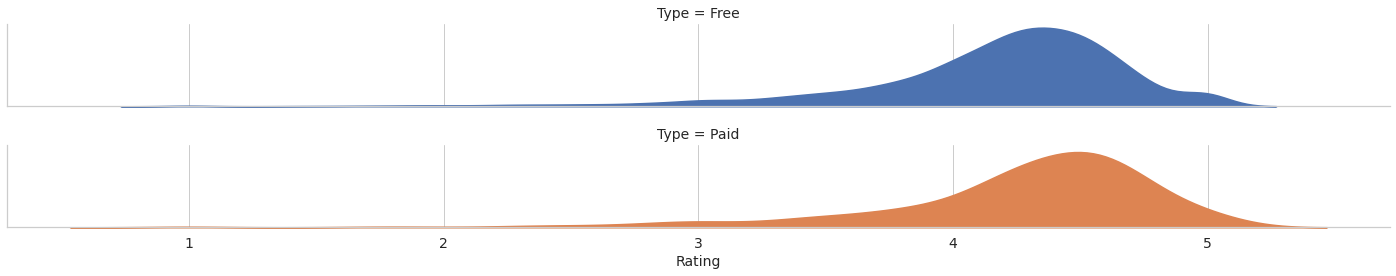

In [104]:
# ridgeline: https://www.python-graph-gallery.com/ridgeline-graph-seaborn

g = sns.FacetGrid(df, row='Type', hue='Type', aspect=10, height=2)
g.map(sns.kdeplot, 'Rating',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

g.set(yticks=[])

Por mais que a **proporção** de apps gratuitos e pagos seja bem diferentes, ao analisar as estatísticas descritivas e os plots, conseguimos afirmar que a _distribuição de avaliações_ de cada tipo é similar, sendo os aplicativos pagos ligeiramente melhor avaliados do que os apps gratuitos.

### 2.10 Qual é distribuição de avaliações de cada tipo de aplicativo de acordo com a quantidade de instalações?
Comparação de 3 variáveis: uma numérica e duas categóricas.

In [105]:
apps_free = df.query('Type == "Free"')
apps_paid = df.query('Type == "Paid"')

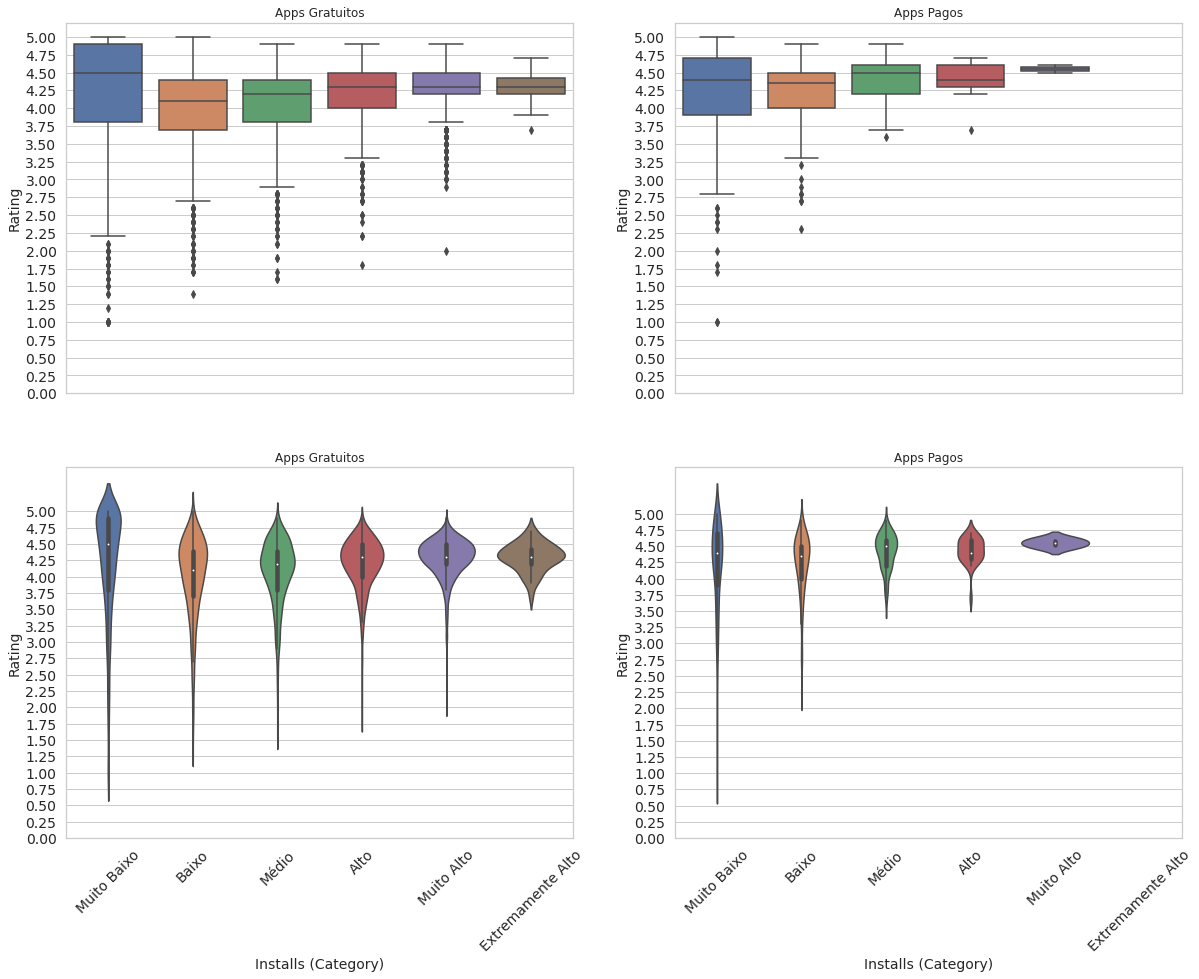

In [117]:
fig, axes = plt.subplots(2, 2, figsize=(20, 15), sharex=True, sharey=False)

sns.boxplot(data=apps_free, x='Installs (Category)', y='Rating', ax=axes[0, 0])
axes[0, 0].set_title('Apps Gratuitos')
axes[0, 0].set_xlabel('')
axes[0, 0].set_yticks(np.arange(0, 5.01, 0.25))

sns.boxplot(data=apps_paid, x='Installs (Category)', y='Rating', ax=axes[0, 1])
axes[0, 1].set_title('Apps Pagos')
axes[0, 1].set_xlabel('')
axes[0, 1].set_yticks(np.arange(0, 5.01, 0.25))

sns.violinplot(data=apps_free, x='Installs (Category)', y='Rating', ax=axes[1, 0])
axes[1, 0].set_title('Apps Gratuitos')
axes[1, 0].xaxis.set_tick_params(rotation=45)
axes[1, 0].set_yticks(np.arange(0, 5.01, 0.25))

sns.violinplot(data=apps_paid, x='Installs (Category)', y='Rating', ax=axes[1, 1])
axes[1, 1].set_title('Apps Pagos')
axes[1, 1].xaxis.set_tick_params(rotation=45)
axes[1, 1].set_yticks(np.arange(0, 5.01, 0.25))

Alguns insights/conlusões:
- No geral, a grande maioria dos apps gratuitos e pagos (~75%) possui avaliações próximas de 3.75 para cima, independente do número de instalações.
- Não temos **apps pagos** que foram **extremamente baixados** (> 100M)
- Não temos a escala de preços, mas faz sentido pensar que quanto maior o preço do app, menor o número de instalações (analisaremos essa hipótese depois)
- Apps gratuitos com número de instalação 'Muito Alta' e 'Extremamente Alta' possuem menor variância entre as avaliações, ou seja, a percepção dos usuários é parecida em cada categoria.
- Apps pagos com número de instalação 'Alta' e 'Muito Alta' possuem menor variância entre as avaliações, ou seja, a percepção dos usuários é parecida em cada categoria.
- Apps com número _'Muito Baixo' de instalações ([0, 1k]) possuem opiniões mais diversas

### 2.11 Qual é avaliação média de cada categoria para cada tipo de aplicativo?
Comparação de 3 variáveis: uma numérica e duas categóricas.

In [118]:
df.groupby(['Category', 'Type']).describe()['Rating']

count      mean       std  min    25%   50%    75%  \
Category          Type                                                       
ART_AND_DESIGN    Free   58.0  4.337931  0.359740  3.2  4.100  4.40  4.700   
                  Paid    3.0  4.733333  0.057735  4.7  4.700  4.70  4.750   
AUTO_AND_VEHICLES Free   72.0  4.184722  0.545315  2.1  3.975  4.30  4.600   
                  Paid    1.0  4.600000       NaN  4.6  4.600  4.60  4.600   
BEAUTY            Free   42.0  4.278571  0.362603  3.1  4.000  4.30  4.575   
...                       ...       ...       ...  ...    ...   ...    ...   
TRAVEL_AND_LOCAL  Paid    8.0  4.100000  0.472077  3.4  3.675  4.25  4.425   
VIDEO_PLAYERS     Free  144.0  4.043056  0.562046  1.8  3.775  4.20  4.400   
                  Paid    4.0  4.100000  0.716473  3.1  3.925  4.25  4.425   
WEATHER           Free   65.0  4.229231  0.330115  3.3  4.000  4.30  4.500   
                  Paid    7.0  4.371429  0.407080  3.8  4.150  4.50  4.600   

                        max  
Category          Type       
ART_AND_DESIGN    Free  5.0  
                  Paid  4.8  
AUTO_AND_VEHICLES Free  4.9  
                  Paid  4.6  
BEAUTY            Free  4.9  
...                     ...  
TRAVEL_AND_LOCAL  Paid  4.7  
VIDEO_PLAYERS     Free  4.9  
                  Paid  4.8  
WEATHER           Free  4.8  
                  Paid  4.8  

[61 rows x 8 columns]

<AxesSubplot:xlabel='Rating', ylabel='Category'>

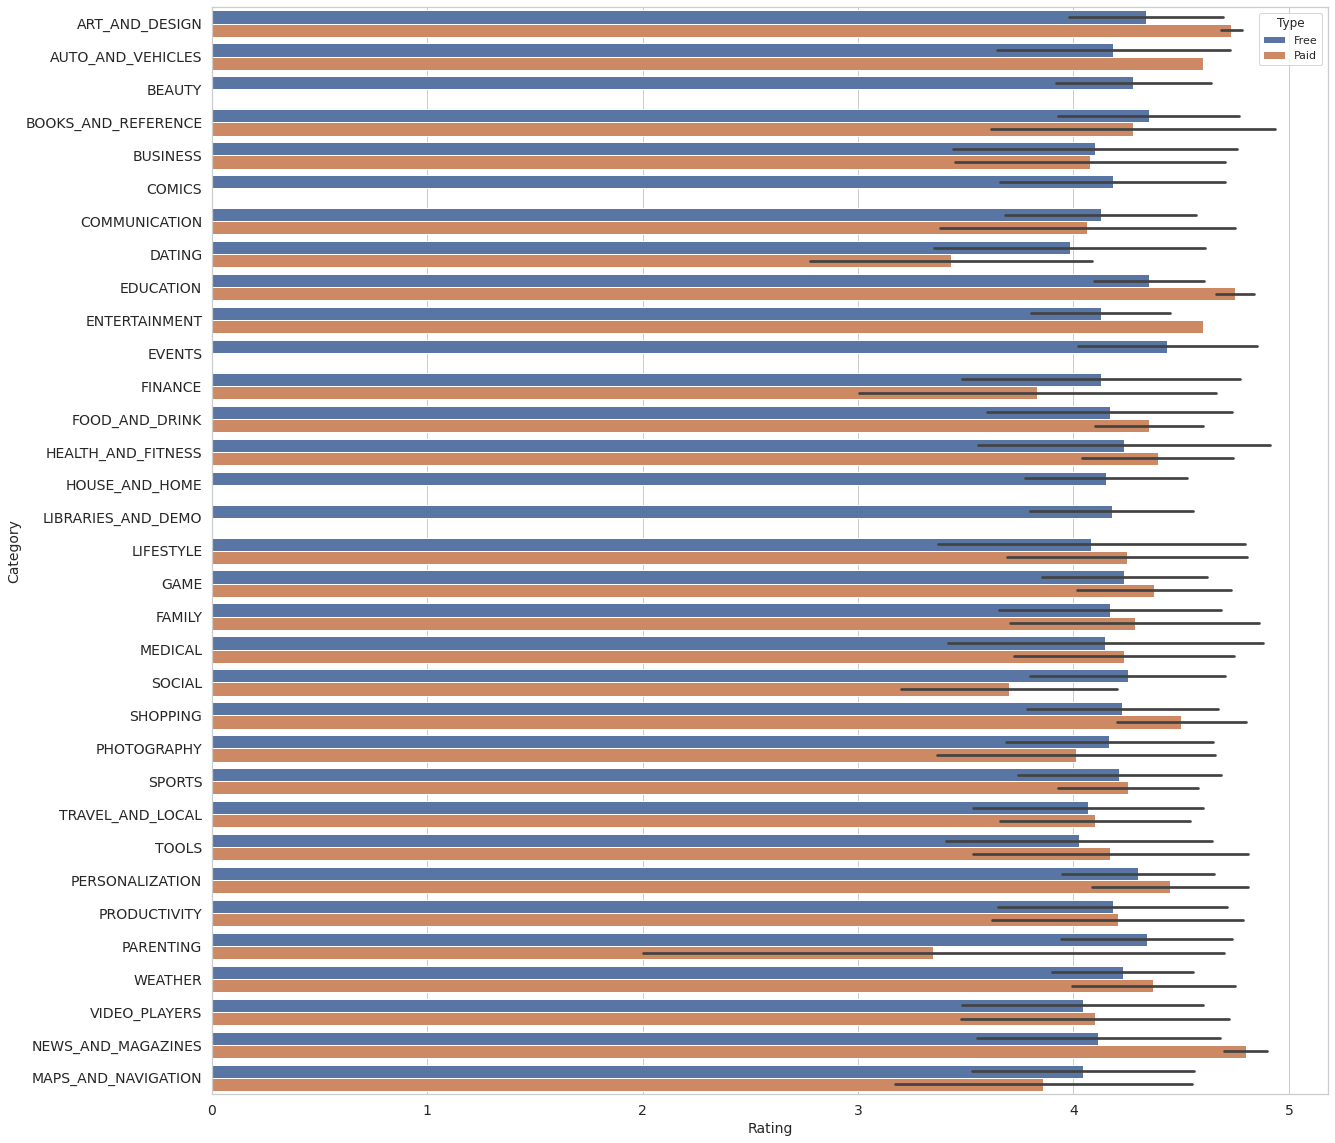

In [119]:
plt.figure(figsize=(20, 20))
sns.barplot(data=df, x='Rating', y='Category', hue='Type', ci='sd')

Analisando este gráfico, podemos identificar algumas categorias cujas as *avaliações médias* **são bem discrepantes** entre os tipos de apps:
P. ex: 'Parenting'.

Podemos querer analisar esta categoria específica para então tentar entender ou buscar insights das causas destas discrepâncias.

In [123]:
apps_parenting = df.query('Category == "PARENTING"')
apps_parenting.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs (Category)
2686,Baby Names,PARENTING,4.5,86,2800000.0,10000,Free,0.0,Everyone,Parenting,2018-08-03,1.7,4.0.3 and up,Baixo
2687,My baby Piano,PARENTING,3.9,17941,12500000.0,5000000,Free,0.0,Everyone,Parenting;Music & Video,2018-05-27,1.0.0,Varies with device,Muito Alto
2688,My baby Game (Balloon POP!),PARENTING,3.8,3614,3300000.0,1000000,Free,0.0,Everyone,Parenting;Brain Games,2018-05-28,2.15.2714,4.0 and up,Alto
2689,Development of the child up to a year,PARENTING,4.6,1413,14000000.0,100000,Free,0.0,Mature 17+,Parenting,2018-07-20,2.9.9,4.1 and up,Médio
2690,Favorite children's songs,PARENTING,4.7,39,95000000.0,10000,Free,0.0,Everyone,Parenting,2018-07-06,1.2.5,4.2 and up,Baixo


In [124]:
print(f'Temos um total de {apps_parenting.shape[0]} apps da categoria "PARENTING"')

Temos um total de 50 apps da categoria "PARENTING"


<AxesSubplot:xlabel='Rating', ylabel='Type'>

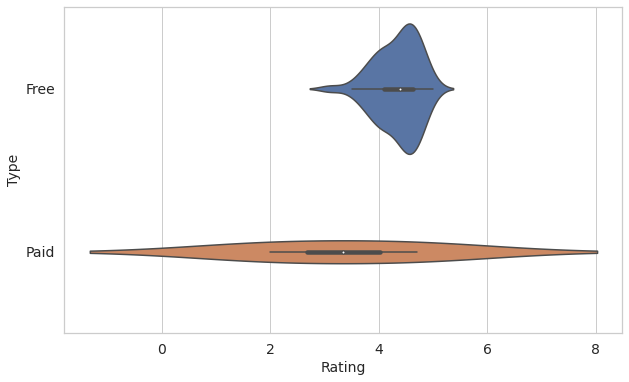

In [125]:
sns.violinplot(data=apps_parenting, x='Rating', y='Type')

<AxesSubplot:ylabel='Type'>

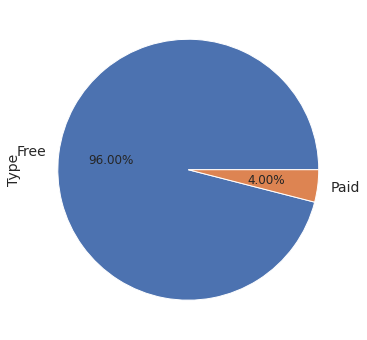

In [126]:
apps_parenting['Type'].value_counts().plot.pie(autopct='%.2f%%')

In [127]:
apps_parenting.query('Type == "Paid"')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs (Category)
4600,Baby Connect (activity log),PARENTING,4.7,8343,8300000.0,50000,Paid,4.99,Everyone,Parenting,2018-07-10,6.3.16,4.0.3 and up,Médio
5793,SharedCare™ Co-parenting,PARENTING,2.0,23,12500000.0,100,Paid,4.59,Everyone,Parenting,2016-06-19,3.0.3,4.0 and up,Muito Baixo


Note que a quantidade de apps **pagos** da category 'Parenting' (2 apps - 4%) é _muito menor_ do que de apps **gratuitos** (96%). Além do problema do desbalanceamento, apenas 2 observações é muito pouco para conseguirmos extrair informações. <br/>

Dado essas observações, **TOME CUIDADO**, pois podemos tirar conclusões precipitadas em situações como essa.

#### Population Pyramid
A Population Pyramid is a pair of back-to-back Histograms (for each sex) that displays the distribution of a population in all age groups and in both sexes. The X-axis is used to plot population numbers and the Y-axis lists all age groups

([<matplotlib.axis.XTick at 0x7f20dd9e4880>,
 [Text(-5, 0, '5'),
  Text(-4, 0, '4'),
  Text(-3, 0, '3'),
  Text(-2, 0, '2'),
  Text(-1, 0, '1'),
  Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

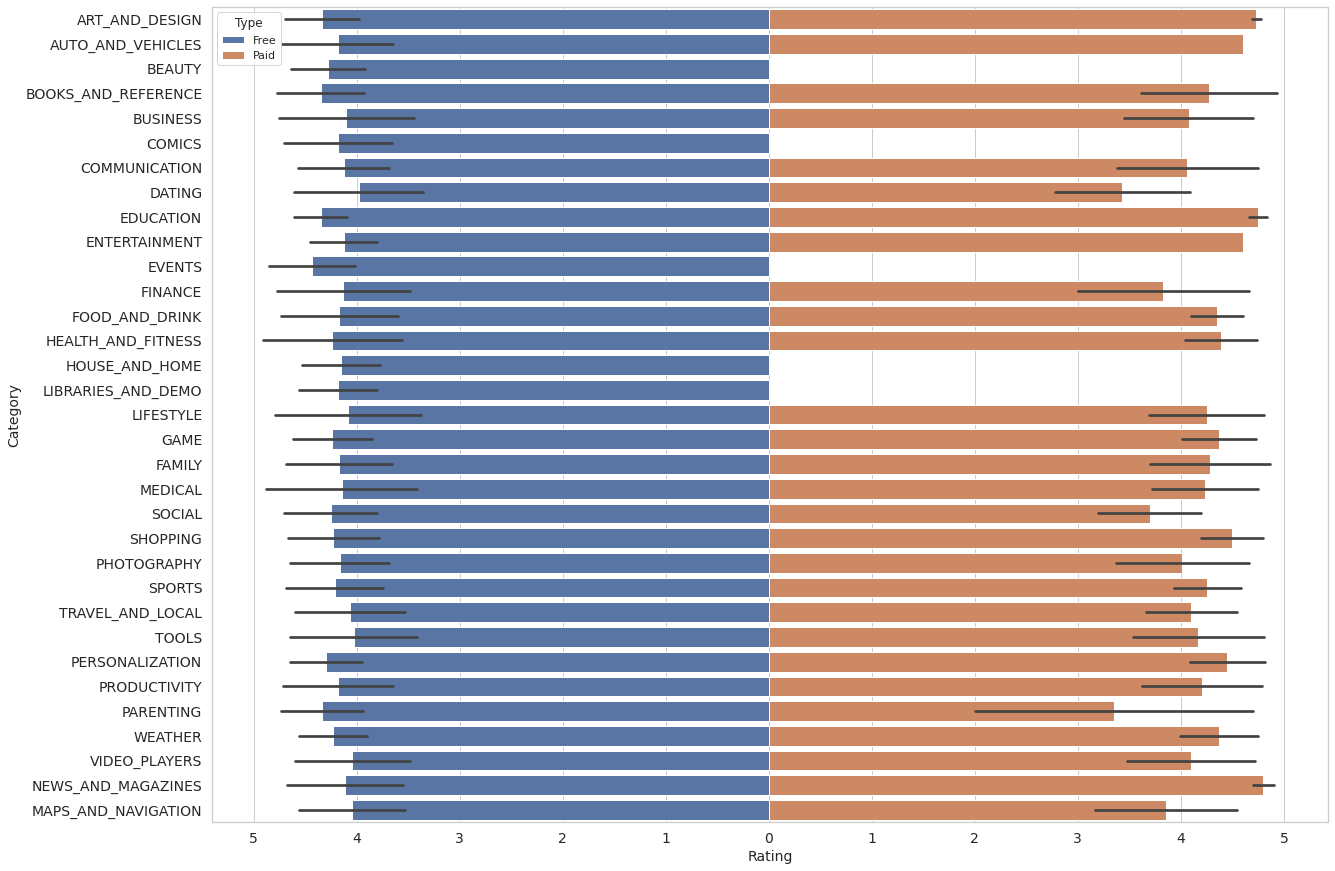

In [128]:
df_viz = df.copy()
selecao = df['Type'] == 'Free'
df_viz.loc[selecao, 'Rating'] *= -1  # invertendo o sinal das avaliações dos apps gratuitos 

plt.figure(figsize=(20, 15))
# dodge: When hue nesting is used, whether elements should be shifted along the categorical axis.
sns.barplot(data=df_viz, x='Rating', y='Category', hue='Type', ci='sd', dodge=False)
plt.xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5], [5, 4, 3, 2, 1, 0, 1, 2, 3, 4, 5])

# Alternativa: https://plotly.com/python/v3/population-pyramid-charts/

_Não levando em consideração o tamanho de cada grupo neste momento_, podemos ver que a média das avaliações dos apps **gratuitos** é relativamente similar em todas as categorias. <br/>
Já para os aplicativos pagos, a dispersão entre as avaliações médias das categorias é maior.

### 2.12 Existe correlação entre os preços dos aplicativos e suas avaliações?
Será que quanto mais caro o app, melhor ou pior avaliado ele é?

In [132]:
apps_paid

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs (Category)
222,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Médio
223,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Médio
360,Puffin Browser Pro,COMMUNICATION,4.0,18247,6100000.0,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Médio
394,"Moco+ - Chat, Meet People",DATING,4.2,1545,14000000.0,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Baixo
395,Calculator,DATING,2.6,57,6200000.0,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Muito Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,FO Bixby,PERSONALIZATION,5.0,5,861000.0,100,Paid,0.99,Everyone,Personalization,2018-04-25,0.2,7.0 and up,Muito Baixo
8099,Mu.F.O.,GAME,5.0,2,16000000.0,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up,Muito Baixo
8140,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400000.0,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,Muito Baixo
8153,Trine 2: Complete Story,GAME,3.8,252,11000000.0,10000,Paid,16.99,Teen,Action,2015-02-27,2.22,5.0 and up,Baixo


In [133]:
corrs = apps_paid[['Price', 'Rating']].corr()
corrs

,Price,Rating
Price,1.000000,-0.112541
Rating,-0.112541,1.000000


In [134]:
print(f"O coeficiente de correlação entre o preço dos apps e suas avaliações é de {corrs.loc['Price', 'Rating']}")

O coeficiente de correlação entre o preço dos apps e suas avaliações é de -0.11254073240141109


<AxesSubplot:xlabel='Price', ylabel='Rating'>

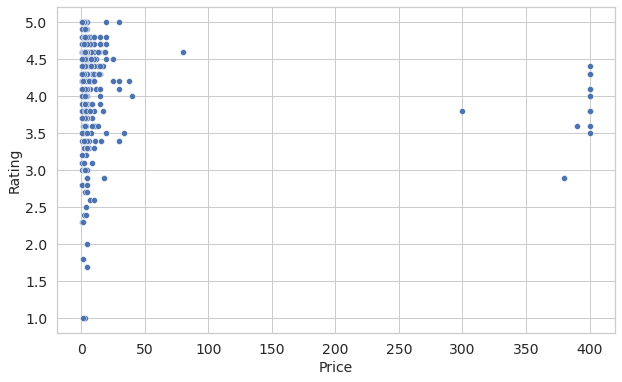

In [135]:
sns.scatterplot(data=apps_paid, x='Price', y='Rating')

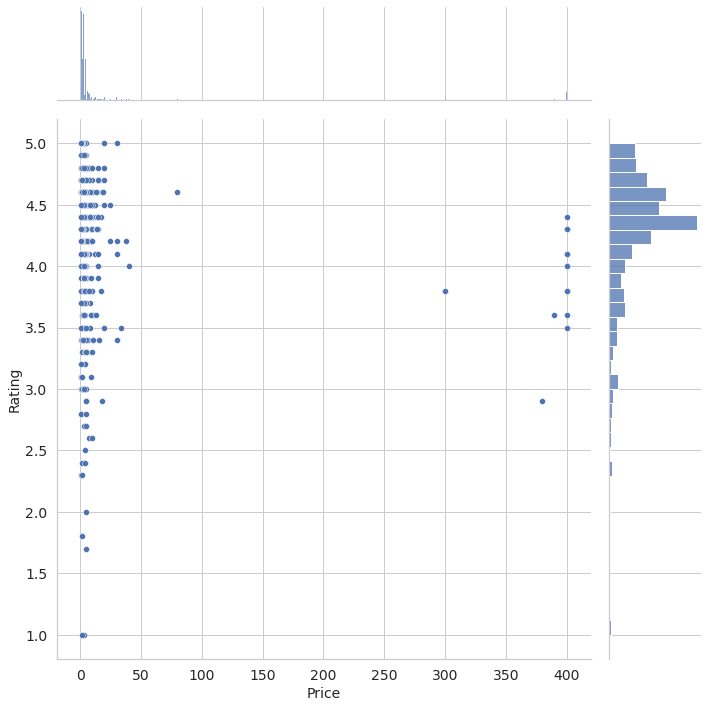

In [136]:
sns.jointplot(data=apps_paid, x='Price', y='Rating', height=10)

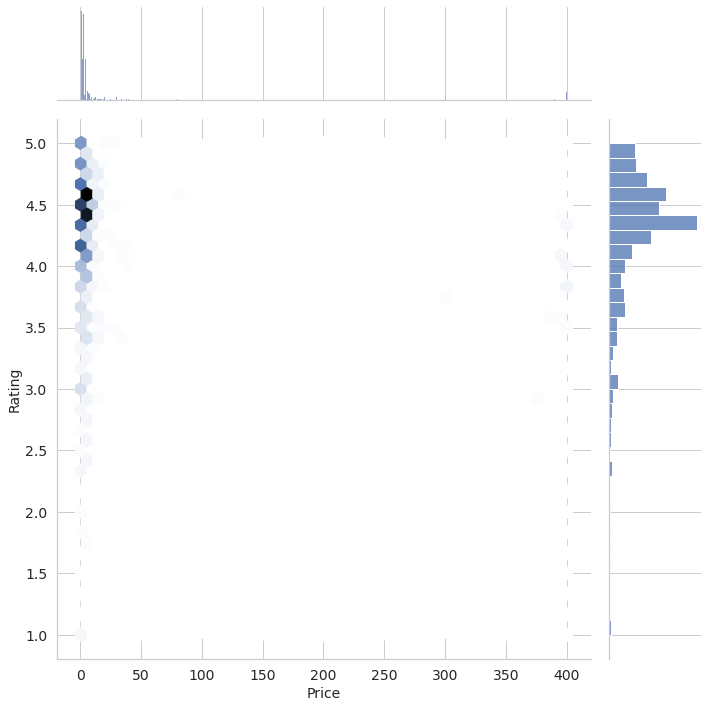

In [137]:
# hexagonal binning
sns.jointplot(data=apps_paid, x='Price', y='Rating', height=10, kind='hex')

<AxesSubplot:xlabel='Price', ylabel='Rating'>

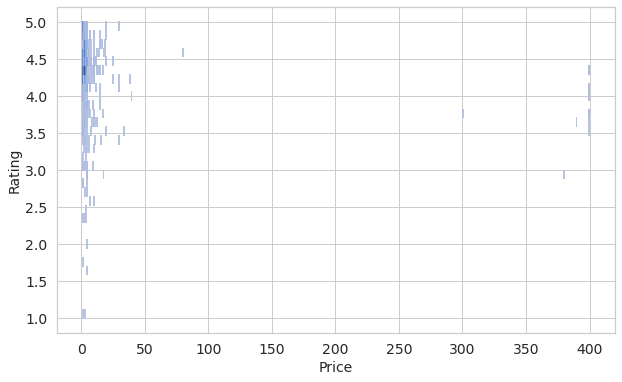

In [138]:
sns.histplot(data=apps_paid, x='Price', y='Rating', )

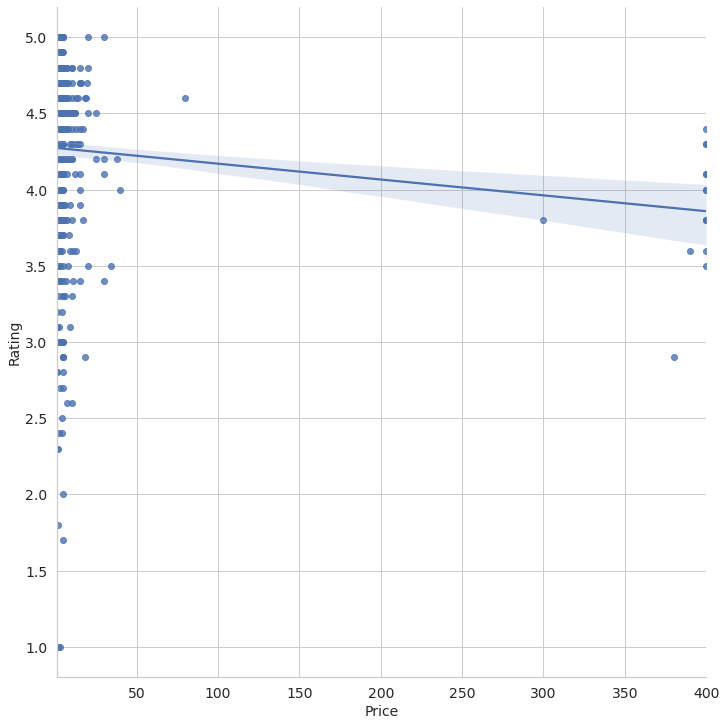

In [140]:
# plota a reta de regressão
sns.lmplot(data=apps_paid, x='Price', y='Rating', height=10)

<br/>

Após todas estas possíveis maneiras de analisar o mesmo fenômeno, concluímos que **não correlação** entre o preço dos apps e suas avaliações.

#### **CORRELAÇÃO DO PREÇOS COM AS DEMAIS VARIÁVEIS NÚMERICAS PARA OS APPS PAGOS**

In [142]:
apps_paid.corr()['Rating']

Rating      1.000000
Reviews     0.045132
Size        0.110751
Installs    0.059973
Price      -0.112541
Name: Rating, dtype: float64

Analisando os **coeficientes de correlação**, vemos que **não há nenhuma correlação forte** entre o preço e outra variável numérica.<br/>
Isso é interessante, pois tínhamos a impressão de que _quanto mais caro o app_ **menor** o _número de instalações_. Vamos analisar esse cenário com mais cuidado na próxima pergunta.

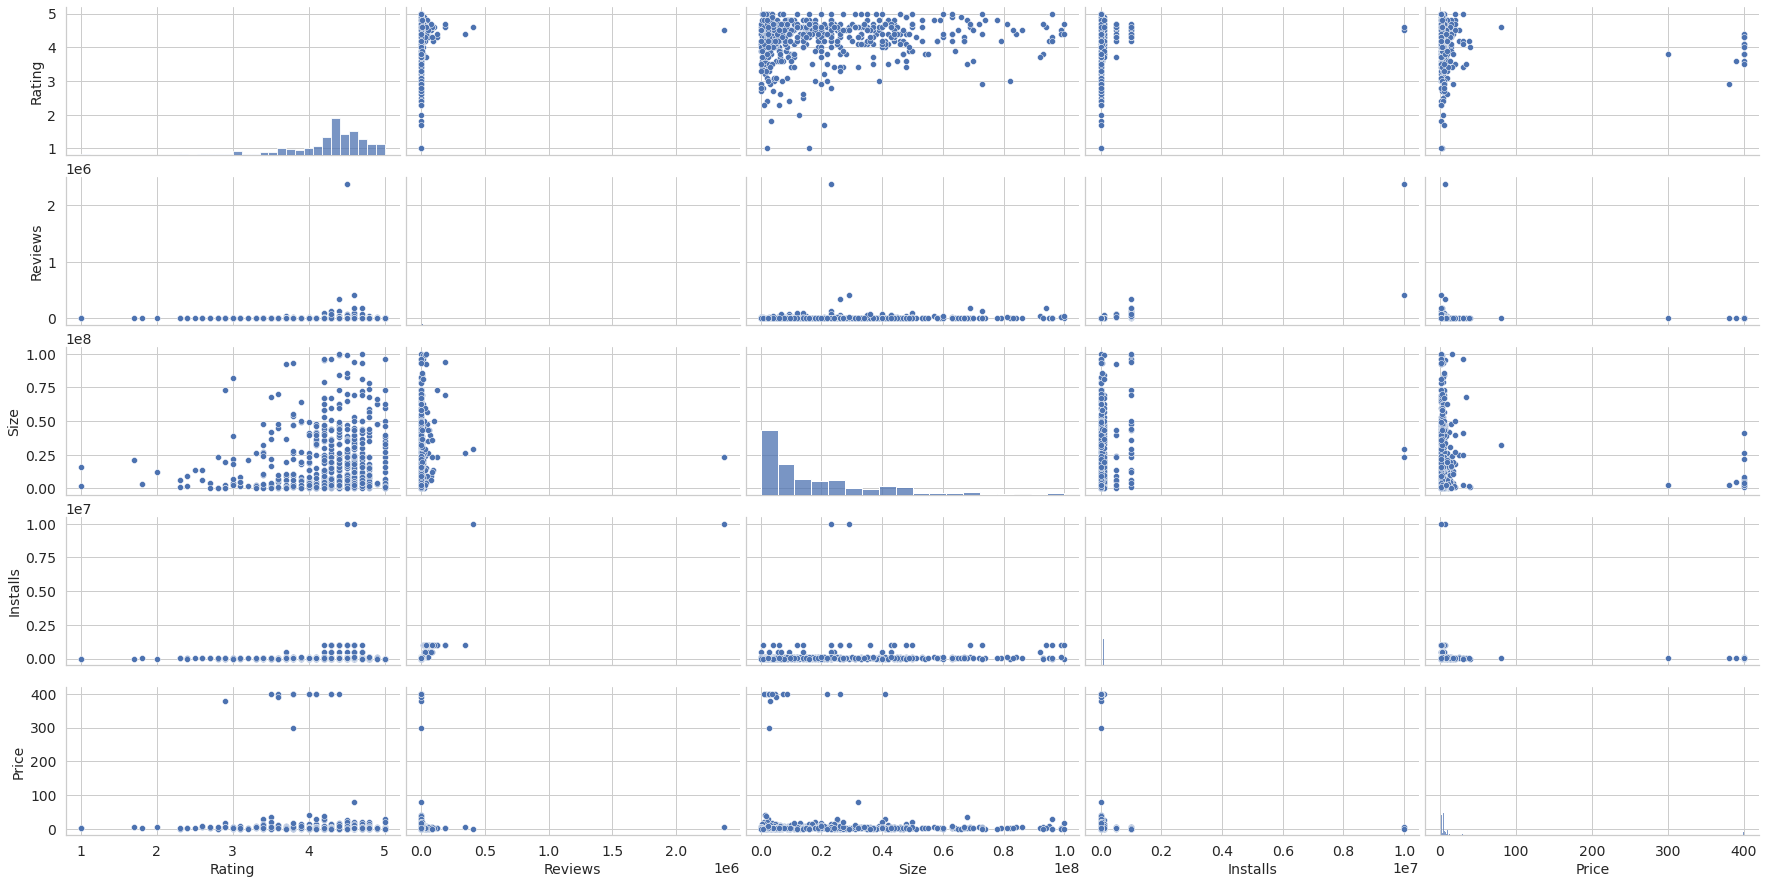

In [143]:
# plotando um gráfico com vários subplots, sendo cada um dele um scatterplot entre os diferentes pares de variáveis numéricas do dataset
sns.pairplot(data=apps_paid, aspect=2)

Por um momento, ignore os os plots de outras variáveis que não incluem o preço.

Olhando para os scatterplots com Preço (última coluna), confirmamos, visualmente, que **não há correlações fortes** entre o **preço** e as demais variáveis númericas. <br/>
O que notamos é que _parece_ haver uma _correlação (não necessariamente causalidade)_ entre as **avaliações** dos _apps pagos_ com seus **tamanhos**. <br/>
Vamos investigar esta hipótese.

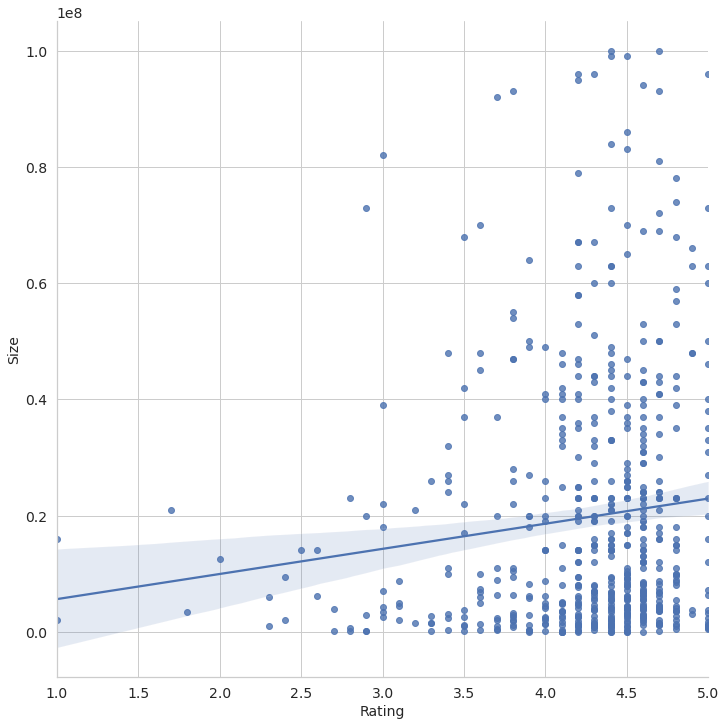

In [150]:
sns.lmplot(data=apps_paid, x='Rating', y='Size', height=10)

Ao analisar, em uma escala visual maior, o scatterplot entre as variáveis 'Rating' e 'Size', vemos que não há correlação entre as variáveis. <br/>
Parece que há uma concentração muito grande de observação na região com Rating entre [4, 5] e Size [0, 0.2e8]. <br/>
Vamos checar isso plotando um **hexagonal binning**.

([<matplotlib.axis.YTick at 0x7f20dca06340>,
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0'),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

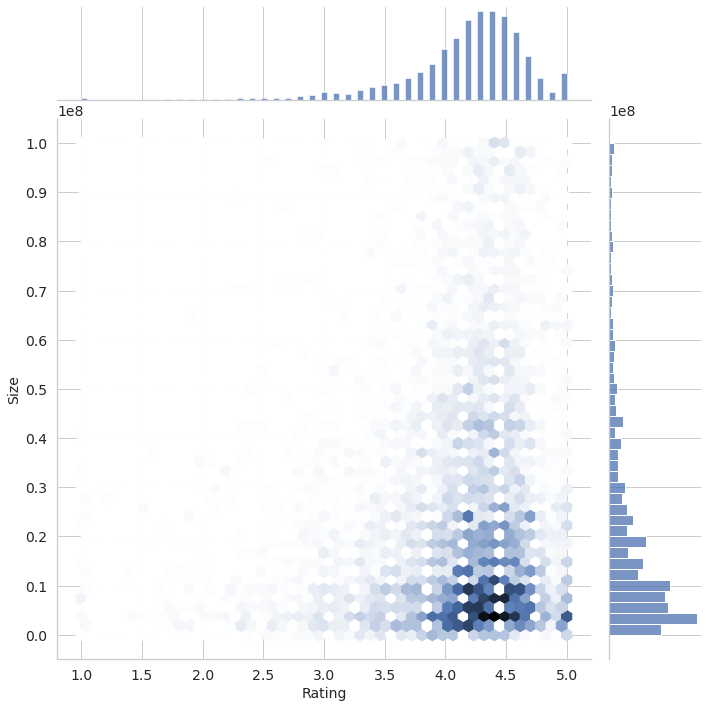

In [153]:
sns.jointplot(data=df, x='Rating', y='Size', kind='hex', height=10)
plt.yticks(np.arange(0, 1.01e8, 0.1e8))

De fato, há uma quantidade muito grande de observações concentradas na região com Rating [4, 4.7] e Size [0, 0.1]. <br/>
Isso mostra que, às vezes, um dado plot, principalmente em escalas pequenas, podem nos enganar visualmente. <br/>

P. ex., ao analisar o scatterplot destas duas variáveis, anteriormente obtido pelo `.pairplot`, tínhamos a impressão que os pontos (observações) estavam bem espalhados. Não conseguimos notas essa concentração de observações em uma mesma região, uma vez que os pontos do scatterplot estavam superpostos. <br/>
Portanto, **cuidado** durante sua análise exploratória.

In [154]:
apps_paid[['Rating', 'Size']].corr()

,Rating,Size
Rating,1.000000,0.110751
Size,0.110751,1.000000


Portanto, ao analisarmos as duas variáveis com mais detalhes e cuidado, percebemos que nossa percepção inicial estava errada.

### 2.13 O número de instalações está correlacionado com o preço dos apps?
Durante a exploração da pergunta 2.10, surgiu a hipótese que _'quanto mais caro for o apps, menor será seu número de instalações/downloads'_. <br/>
Vamos então investigar essa hipótese a fundo.

In [89]:
apps_paid[['Installs', 'Price']].corr()

,Installs,Price
Installs,1.00000,-0.02354
Price,-0.02354,1.00000


Pelo coeficiente de correlação, **NÃO** há correlação entre essas duas variáveis.

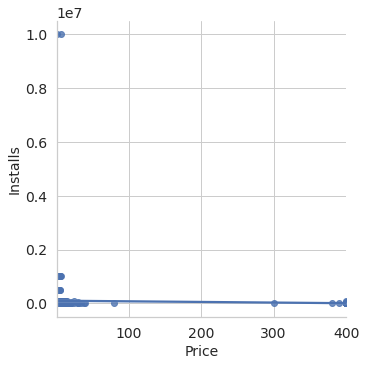

In [155]:
sns.lmplot(data=apps_paid, x='Price', y='Installs')

Vemos que há alguns **outliers** que dificultam a visualização. Vamos removê-los "no olho".

In [156]:
apps_paid_viz = apps_paid.query('Installs < 0.05e7')

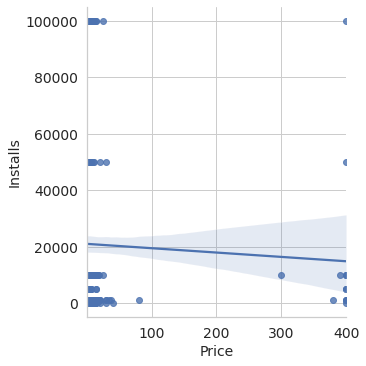

In [157]:
sns.lmplot(data=apps_paid_viz, x='Price', y='Installs')

Realmente, não há correlação entre o número de instalações e os preços dos apps, pois há apps caros ($ 400.0) com número médio de instalações: (10k, 100k]. Vejamos quem são eles (o que comem, onde moram, ...) =D

In [158]:
apps_paid.query('Price > 300 and Installs > 5000').sort_values(by='Installs', ascending=False)  # usamos um threshold bem baixo para o número de instalações, para considerar o grupo 'Baixo'

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs (Category)
4099,I am rich,LIFESTYLE,3.8,3547,1800000.0,100000,Paid,399.99,Everyone,Lifestyle,2018-01-12,2.0,4.0.3 and up,Médio
4103,I Am Rich Premium,FINANCE,4.1,1867,4700000.0,50000,Paid,399.99,Everyone,Finance,2017-11-12,1.6,4.0 and up,Médio
3303,💎 I'm rich,LIFESTYLE,3.8,718,26000000.0,10000,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4 and up,Baixo
3307,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.00,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up,Baixo
4101,I am Rich Plus,FAMILY,4.0,856,8700000.0,10000,Paid,399.99,Everyone,Entertainment,2018-05-19,3.0,4.4 and up,Baixo
4113,I Am Rich,FAMILY,3.6,217,4900000.0,10000,Paid,389.99,Everyone,Entertainment,2018-06-22,1.5,4.2 and up,Baixo


Os dois primeiros apps custam +- $ 400.0 e foram muito baixados. Após uma pesquisa simples no google: https://www.techtudo.com.br/artigos/noticia/2012/03/aplicativos-de-celular-que-servem-apenas-para-mostrar-o-quanto-voce-e-rico.html

Este é um ponto importante: Nossa **análise exploratória** visa explorar padrões/comportamentos nos dados. A causalidade de tais não estarão mostradas, necessariamente, nessa exploração (números, tabelas, gráficos). É preciso então, em um segundo momento, visar entender tais causalidades.

#### **Analisando apenas apps com preço <= $100**

In [159]:
# apps pagos com preço menor ou igual (less than or equal to - leq) a 100 dólares
apps_paid_price_leq_100 = apps_paid.query('Price <= 100')
apps_paid_price_leq_100

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs (Category)
222,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800000.0,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,Médio
223,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000000.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,Médio
360,Puffin Browser Pro,COMMUNICATION,4.0,18247,6100000.0,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,Médio
394,"Moco+ - Chat, Meet People",DATING,4.2,1545,14000000.0,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,Baixo
395,Calculator,DATING,2.6,57,6200000.0,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,Muito Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,FO Bixby,PERSONALIZATION,5.0,5,861000.0,100,Paid,0.99,Everyone,Personalization,2018-04-25,0.2,7.0 and up,Muito Baixo
8099,Mu.F.O.,GAME,5.0,2,16000000.0,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up,Muito Baixo
8140,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400000.0,1000,Paid,7.99,Everyone,Health & Fitness,2018-08-08,1.9.3,4.2 and up,Muito Baixo
8153,Trine 2: Complete Story,GAME,3.8,252,11000000.0,10000,Paid,16.99,Teen,Action,2015-02-27,2.22,5.0 and up,Baixo


In [160]:
apps_paid_price_leq_100.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.043807,0.103471,0.058266,-0.028623
Reviews,0.043807,1.000000,0.048722,0.807024,0.006124
Size,0.103471,0.048722,1.000000,0.085061,0.034015
Installs,0.058266,0.807024,0.085061,1.000000,-0.024954
Price,-0.028623,0.006124,0.034015,-0.024954,1.000000


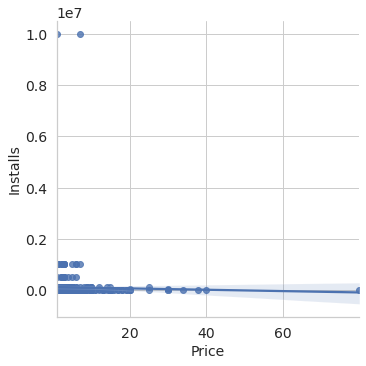

In [161]:
sns.lmplot(data=apps_paid_price_leq_100, x='Price', y='Installs')

Bem, mesmo removendo "outliers" e analisando apenas uma faixa de preço, **não há correlação** entre o **preço dos apps** e o **número de ínstalações** (ao menos para este problema e dataset).

### 2.14 Qual a correlação entre as variáveis numéricas?
Vamos agora fazer uma busca geral, correlacionando todas as variáveis numéricas de nosso dataset. Nosso intuito, é tentar encontrar algum correlação entre variáveis.

In [163]:
df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055099,0.055434,0.040165,-0.021196
Reviews,0.055099,1.000000,0.061513,0.624054,-0.007788
Size,0.055434,0.061513,1.000000,0.017839,-0.022789
Installs,0.040165,0.624054,0.017839,1.000000,-0.009653
Price,-0.021196,-0.007788,-0.022789,-0.009653,1.000000


Apenas analisando os **coeficientes de correlação**, vemos que as únicas variáveis numéricas que apresentam alguma correlação são **Installs** (número de instalações) e **Reviews** (número de revisões), o que é meio óbvio, pensando bem =D

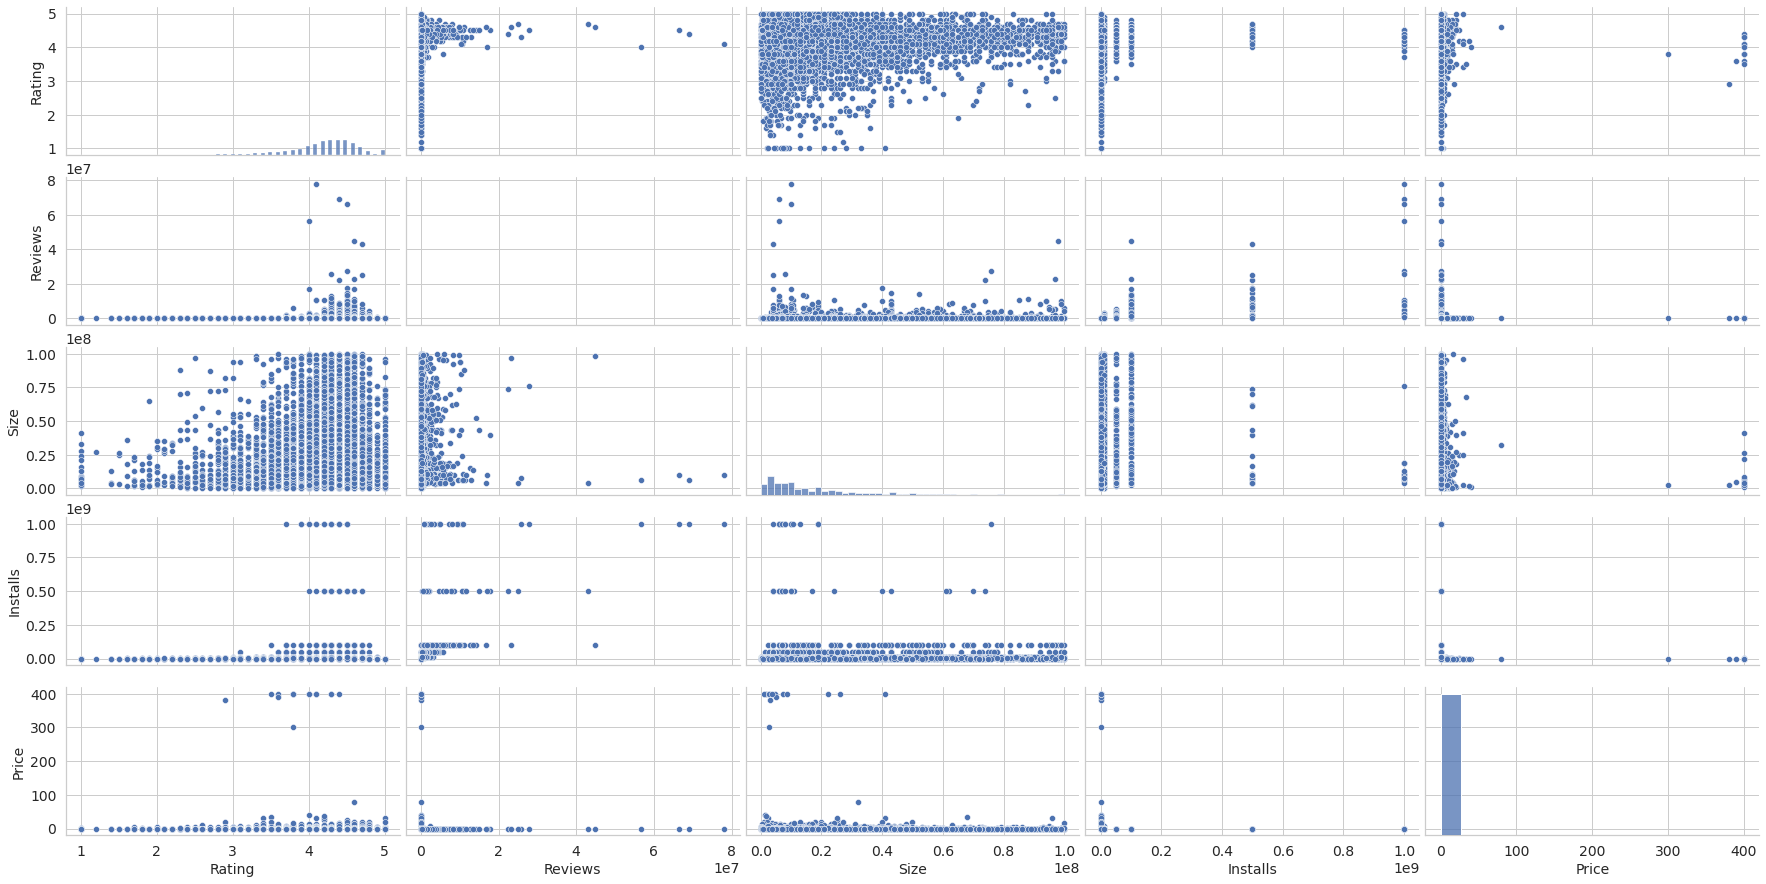

In [165]:
sns.pairplot(data=df, aspect=2)

Visualmente, a correlação de tais variáveis é visível.

Será que há algum padrão diferente ao diferenciarmos apps gratuitos dos pagos?

/home/hisamuka/yeah/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


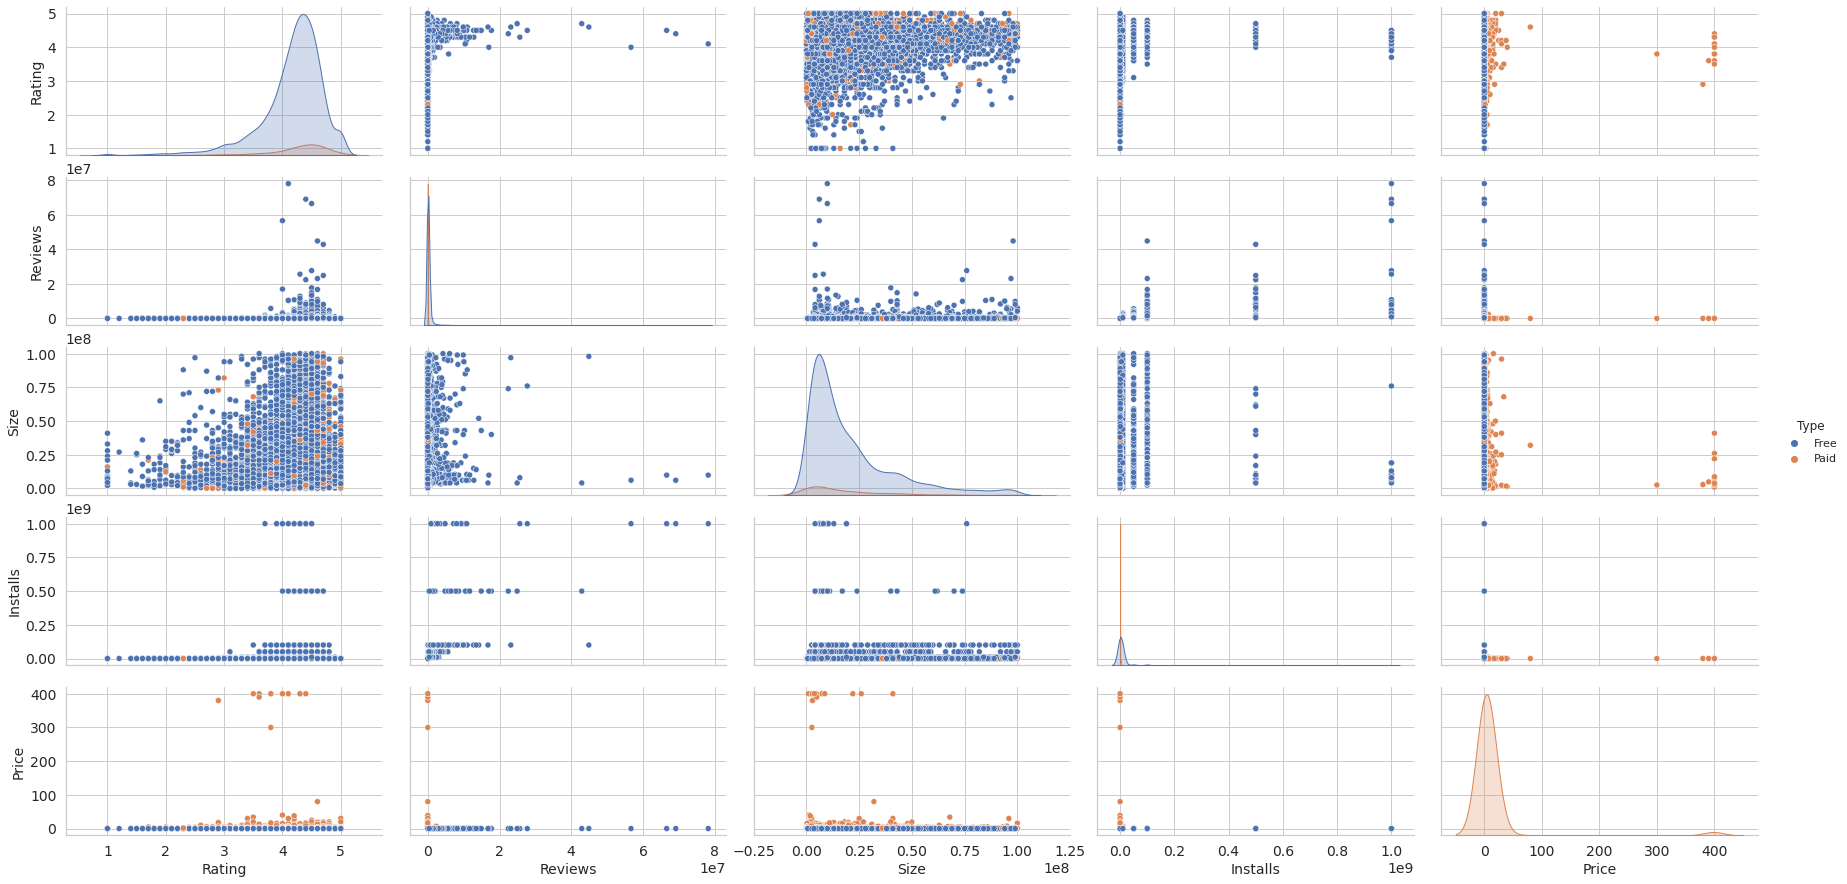

In [166]:
sns.pairplot(data=df, hue='Type', aspect=2)

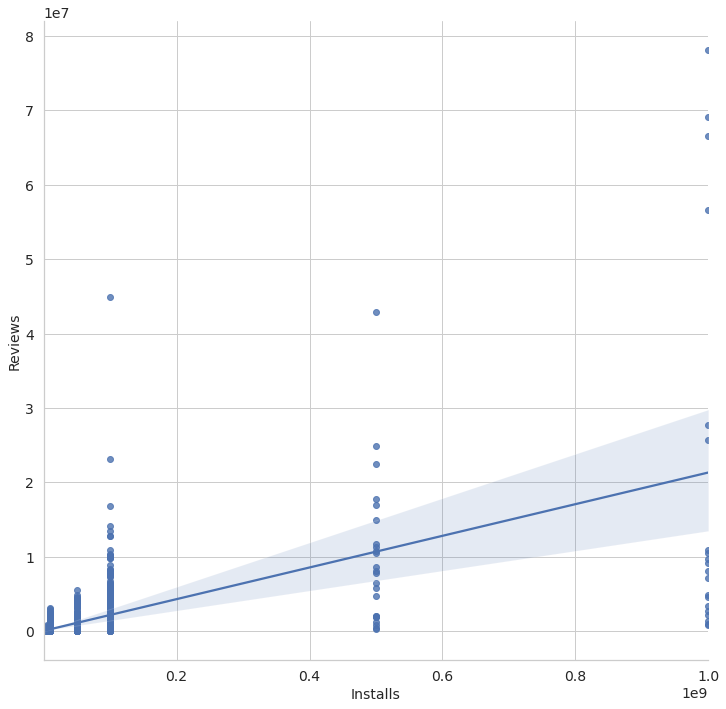

In [168]:
sns.lmplot(data=df, x='Installs', y='Reviews', height=10)

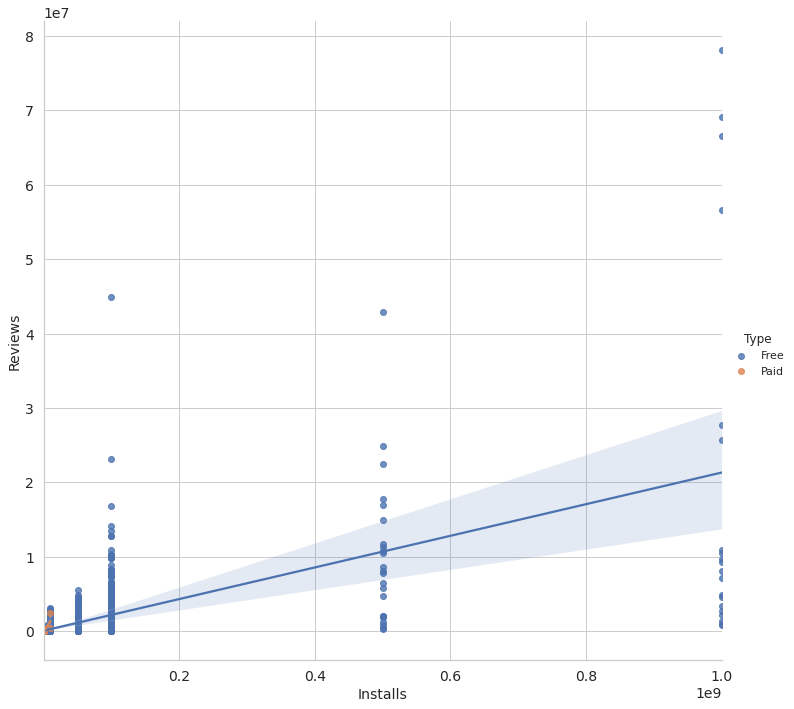

In [169]:
# diferenciando os apps gratuitos e pagos no gráfico
sns.lmplot(data=df, x='Installs', y='Reviews', hue='Type', height=10)

Note que a quantidade de instalações e de reviews são bem baixas para os apps pagos.

### 2.15 Como estão distribuídas as categorias de acordo com a classificação de conteúdo?

In [170]:
series_viz = df.groupby(by='Category')['Content Rating'].value_counts().sort_index()  # ordena os índice em ordem alfabética, pq o value_counts()  ordena em ordem contagem
series_viz

Category           Content Rating
ART_AND_DESIGN     Everyone          57
                   Everyone 10+       1
                   Teen               3
AUTO_AND_VEHICLES  Everyone          71
                   Everyone 10+       1
                                     ..
VIDEO_PLAYERS      Teen              21
WEATHER            Everyone          68
                   Everyone 10+       1
                   Mature 17+         1
                   Teen               2
Name: Content Rating, Length: 113, dtype: int64

In [171]:
df_viz = series_viz.unstack()
df_viz

Content Rating,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
Category,,,,,,
ART_AND_DESIGN,NaN,57.0,1.0,NaN,3.0,NaN
AUTO_AND_VEHICLES,NaN,71.0,1.0,NaN,1.0,NaN
BEAUTY,NaN,39.0,NaN,1.0,2.0,NaN
BOOKS_AND_REFERENCE,NaN,146.0,4.0,3.0,16.0,NaN
BUSINESS,NaN,259.0,NaN,NaN,4.0,NaN
COMICS,2.0,25.0,2.0,6.0,19.0,NaN
COMMUNICATION,NaN,230.0,NaN,7.0,19.0,NaN
DATING,NaN,6.0,NaN,125.0,3.0,NaN
EDUCATION,NaN,111.0,3.0,3.0,1.0,NaN


<AxesSubplot:xlabel='Content Rating', ylabel='Category'>

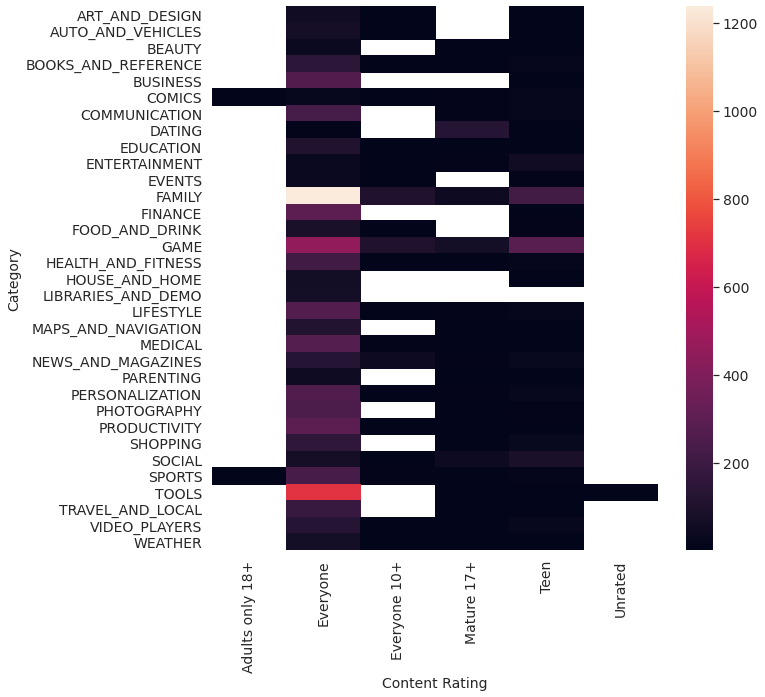

In [172]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_viz)

<AxesSubplot:xlabel='Content Rating', ylabel='Category'>

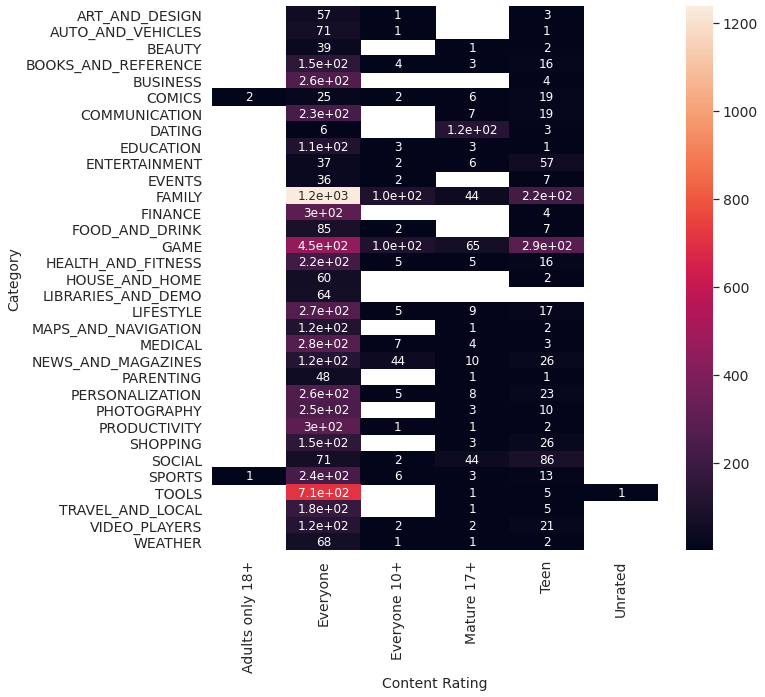

In [173]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_viz, annot=True)

## Continue a exploração
**Sugestões**:
- Analisar as categorias e gêneros
- Analisar os gêneros e tipos de apps
- Analisar as avaliações e números de instalações por gênero
- Relacionar a indicação de conteúdo com o número de instalações
- Organize todos os achados e conclusões deste notebook em uma apresentação que conte uma história